In [3]:
import sys
import os
from pathlib import Path
import pandas as pd


current_dir = Path(os.getcwd())
project_root = current_dir.parent

if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    print(f"✅ Added to path: {project_root}")

from src.diagnostics.plotting import plot_structural_check
 

In [4]:
data_path = project_root / "DATA/processed/master_df.parquet"
df = pd.read_parquet(data_path)
df.head()

bond_yields__GTUSD2Y Govt  bond_yields__GTUSD5Y Govt  \
date                                                               
1990-01-01                        NaN                        NaN   
1990-01-02                      7.875                      7.847   
1990-01-03                      7.927                      7.911   
1990-01-04                      7.910                      7.900   
1990-01-05                      7.885                      7.896   

            bond_yields__GTUSD10Y Govt  bond_yields__GTEUR2Y Govt  \
date                                                                
1990-01-01                         NaN                        NaN   
1990-01-02                       7.930                        NaN   
1990-01-03                       7.974                        NaN   
1990-01-04                       7.972                        NaN   
1990-01-05                       7.984                        NaN   

            bond_yields__GTEUR5Y Govt  bond_yields__GTEUR10Y Govt  \
date                                                                
1990-01-01                        NaN                         NaN   
1990-01-02                        NaN                         NaN   
1990-01-03                        NaN                         NaN   
1990-01-04                        NaN                         NaN   
1990-01-05                        NaN                         NaN   

            bond_yields__GTJPY2Y Govt  bond_yields__GTJPY5Y Govt  \
date                                                               
1990-01-01                        NaN                        NaN   
1990-01-02                        NaN                        NaN   
1990-01-03                        NaN                        NaN   
1990-01-04                        NaN                        NaN   
1990-01-05                        NaN                        NaN   

            bond_yields__GTJPY10Y Govt  bond_yields__GTCNY2Y Govt  ...  \
date                                                               ...   
1990-01-01                         NaN                        NaN  ...   
1990-01-02                       5.733                        NaN  ...   
1990-01-03                       5.733                        NaN  ...   
1990-01-04                       5.842                        NaN  ...   
1990-01-05                       5.881                        NaN  ...   

            us_eq__VIX Index  us_eq__SPX Index  fx_1m__EUR1M BGN Curncy  \
date                                                                      
1990-01-01               NaN               NaN                      NaN   
1990-01-02             17.24            359.69                      NaN   
1990-01-03             18.19            358.76                      NaN   
1990-01-04             19.22            355.67                      NaN   
1990-01-05             20.11            352.20                      NaN   

            fx_1m__JPY1M BGN Curncy  fx_1m__CNH1M BGN Curncy  \
date                                                           
1990-01-01                 143.5388                      NaN   
1990-01-02                 146.0322                      NaN   
1990-01-03                 145.4898                      NaN   
1990-01-04                 143.1708                      NaN   
1990-01-05                 143.6125                      NaN   

            fx_1m__AUD1M BGN Curncy  fx_ov_iv__EURUSDVON BGN Curncy  \
date                                                                  
1990-01-01                      NaN                             NaN   
1990-01-02                 1.283532                             NaN   
1990-01-03                 1.287498                             NaN   
1990-01-04                 1.277302                             NaN   
1990-01-05                 1.283862                             NaN   

            fx_ov_iv__USDJPYVON BGN Curncy  fx_ov_iv__USDCNHVON BGN Curncy  \
date                

Observations: Core Market (Bond Yields)

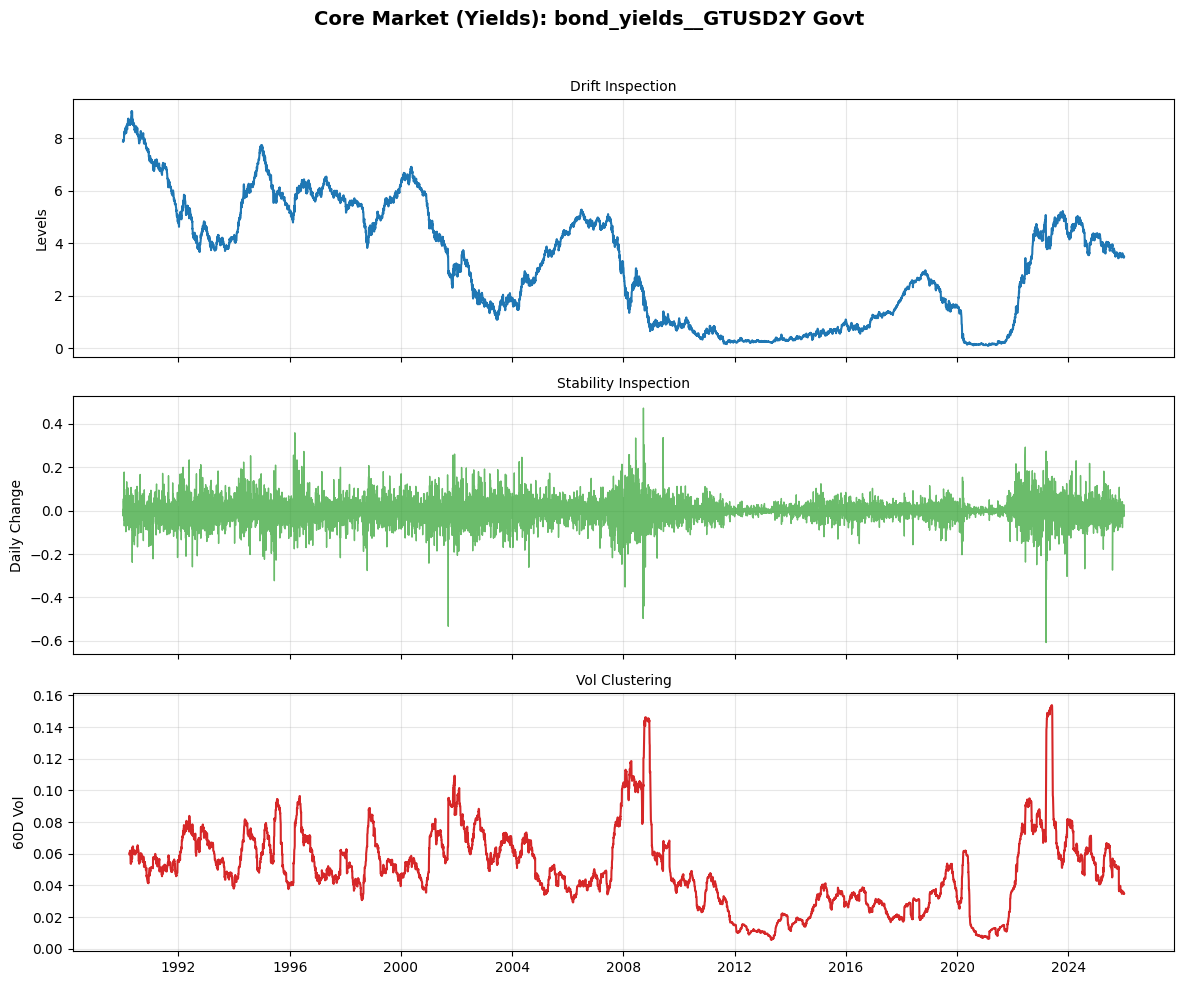

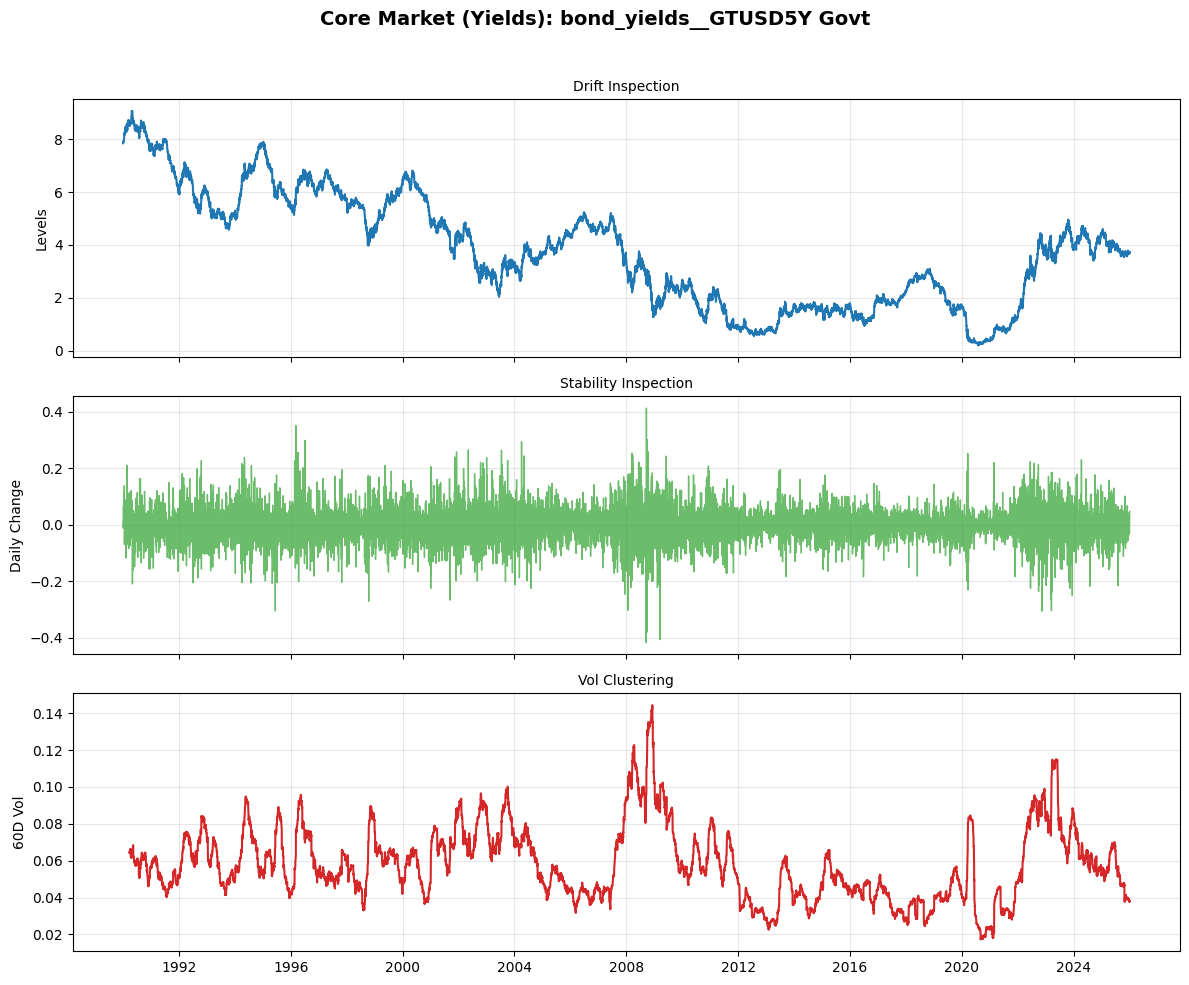

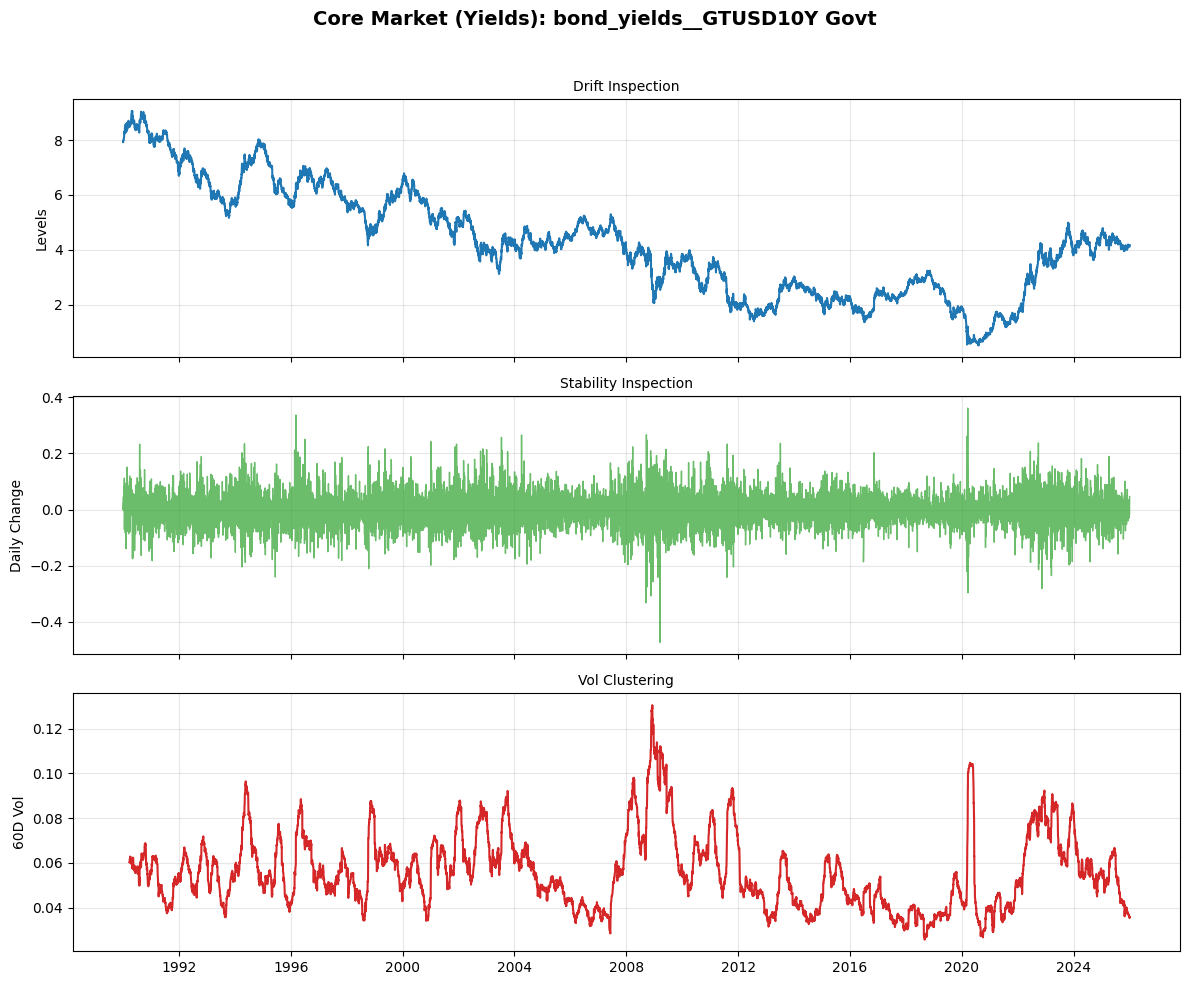

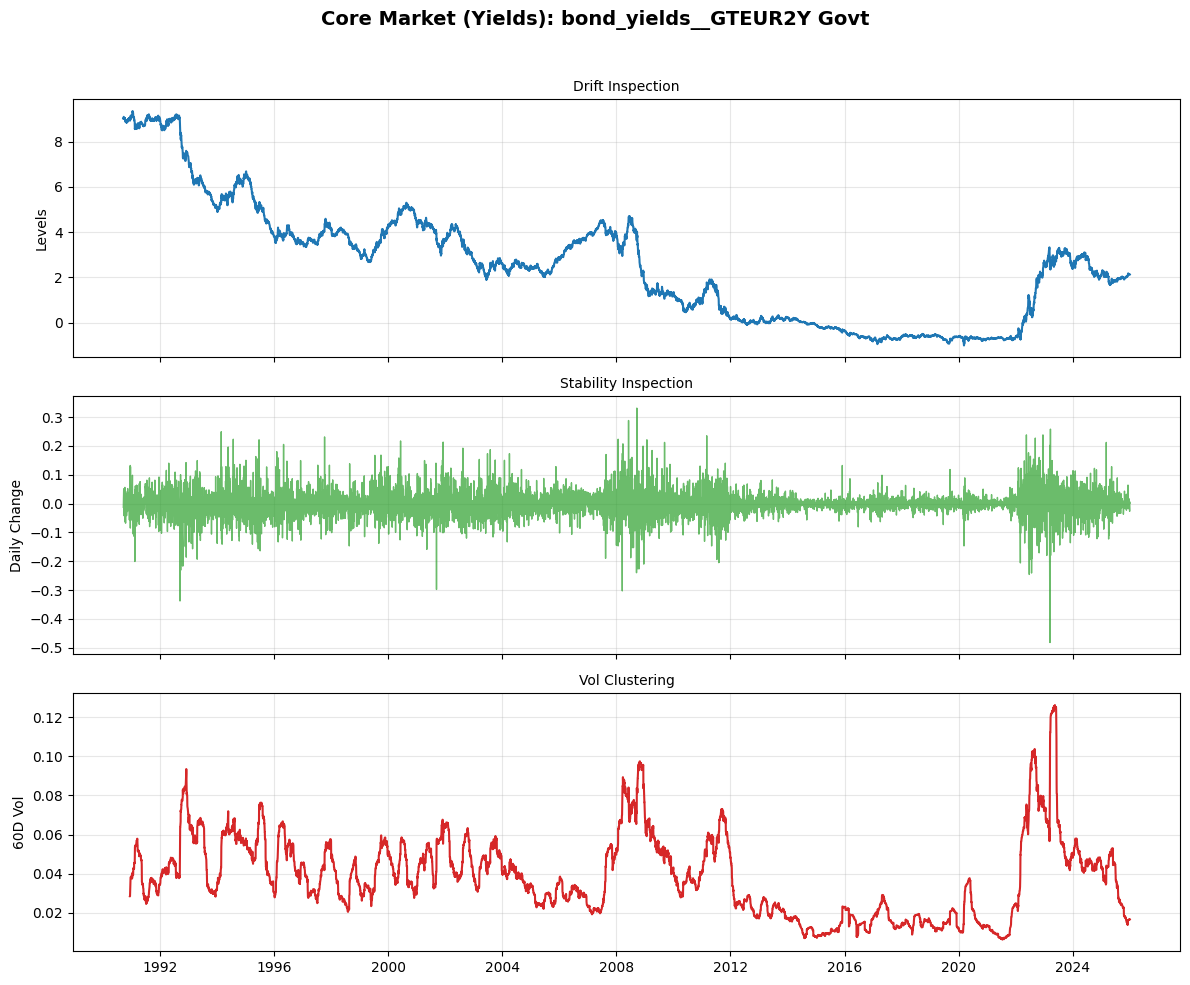

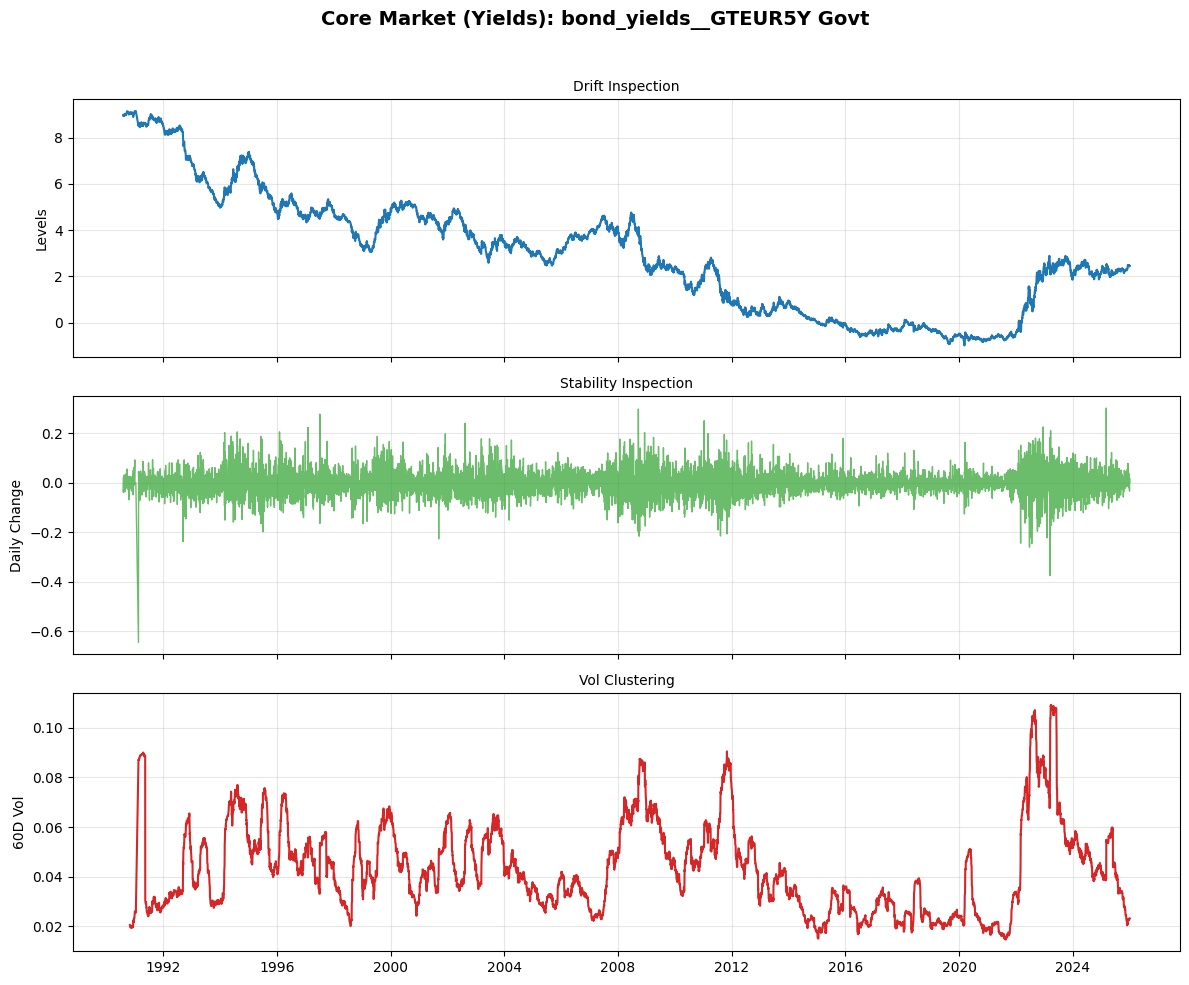

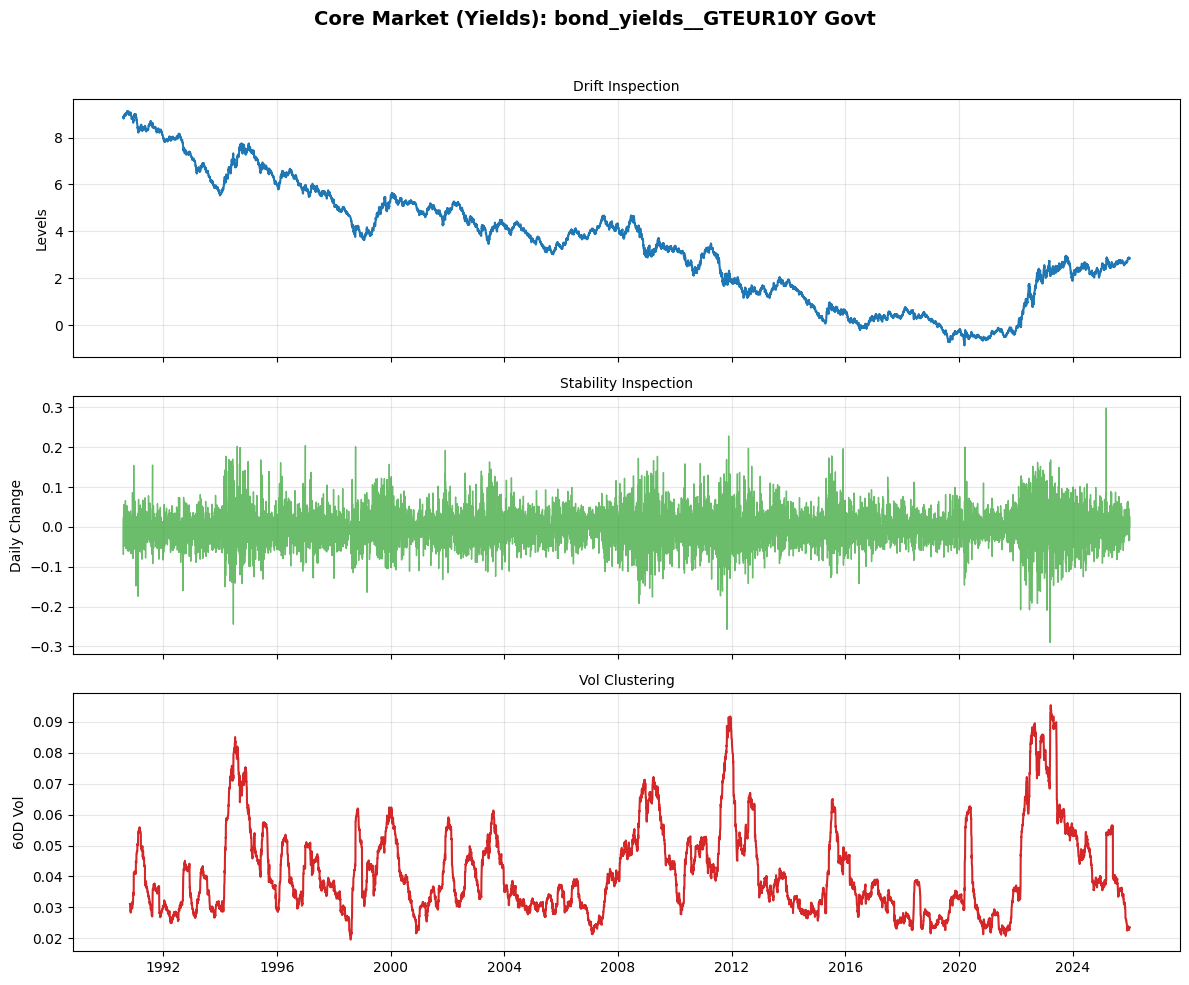

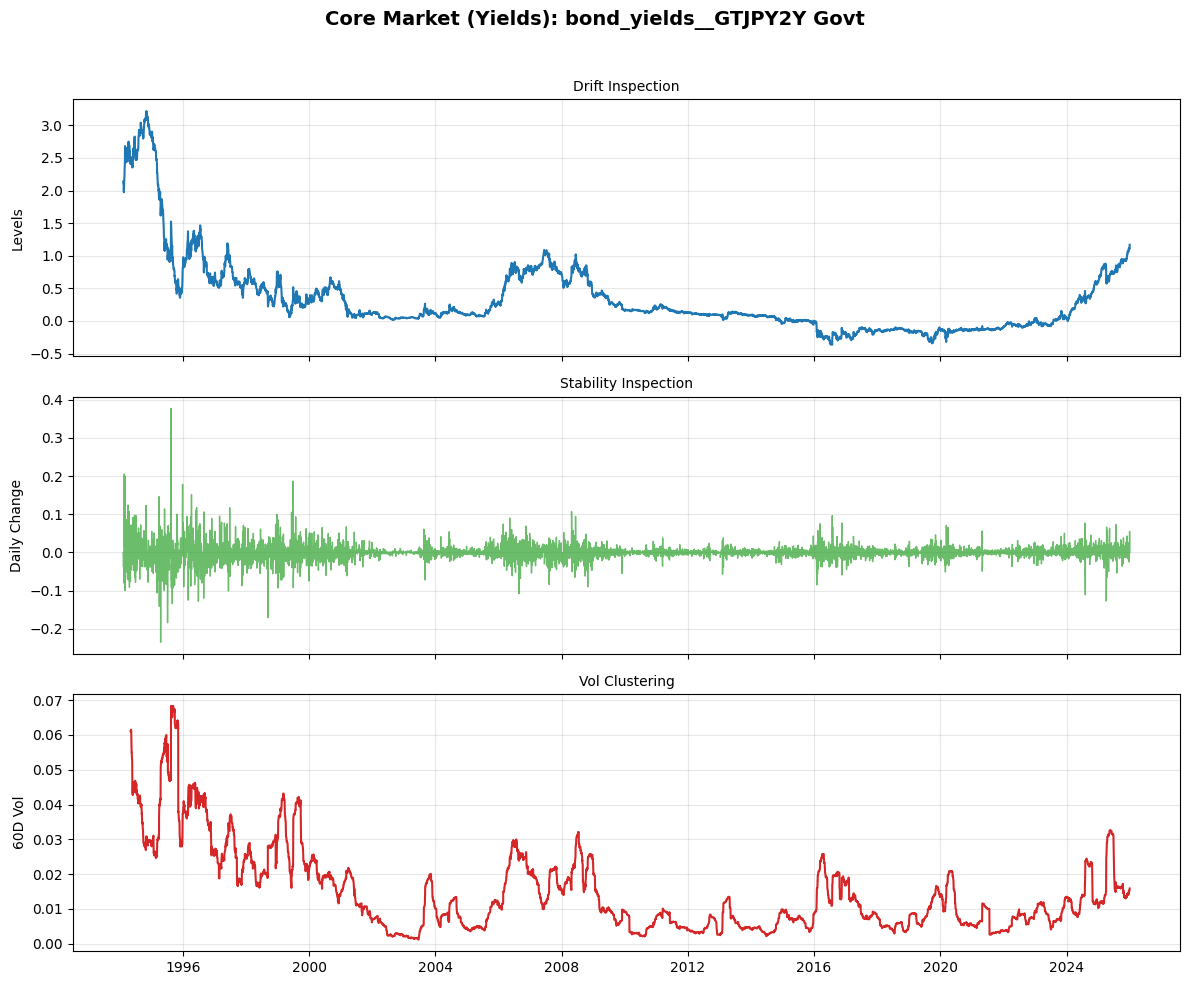

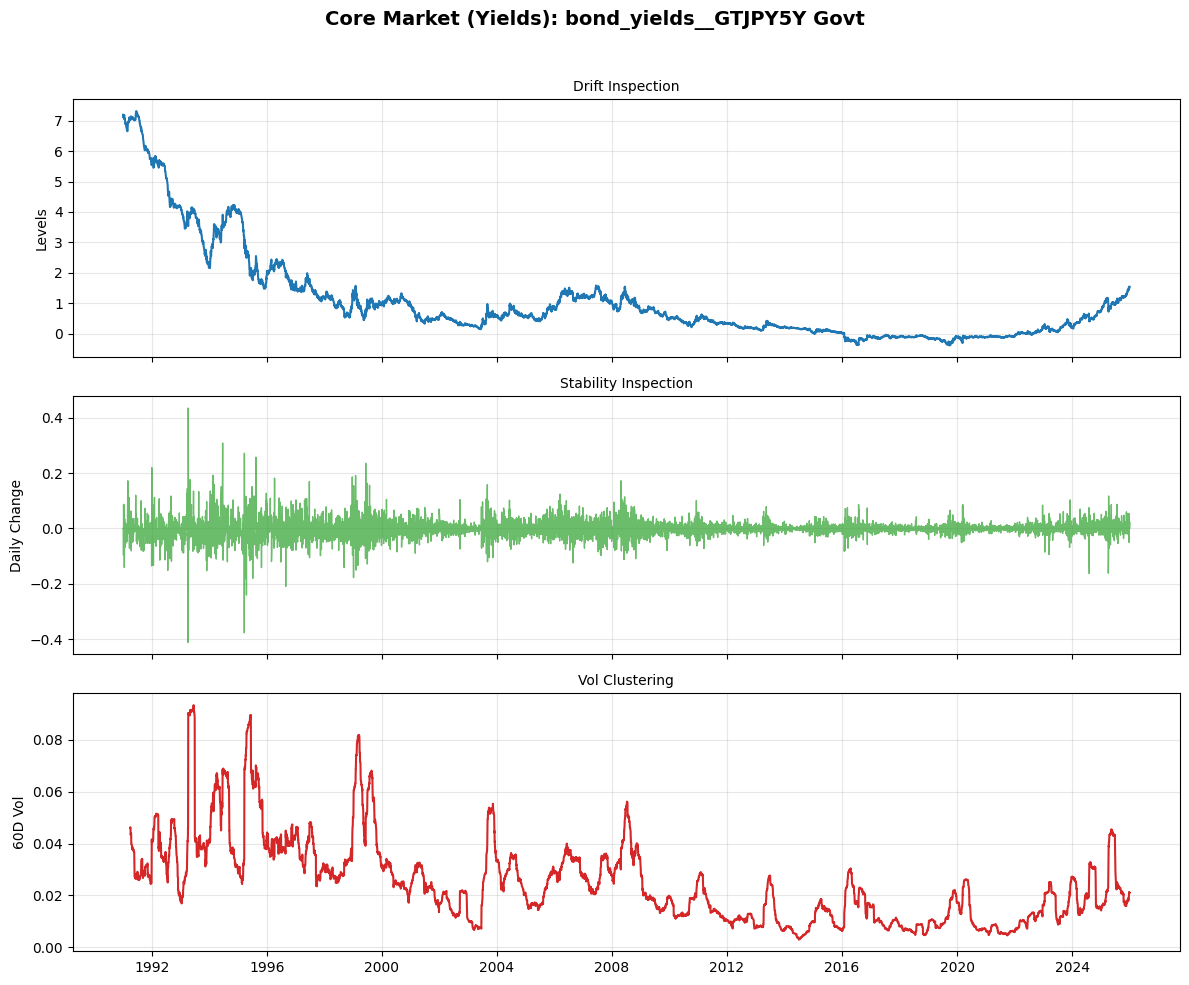

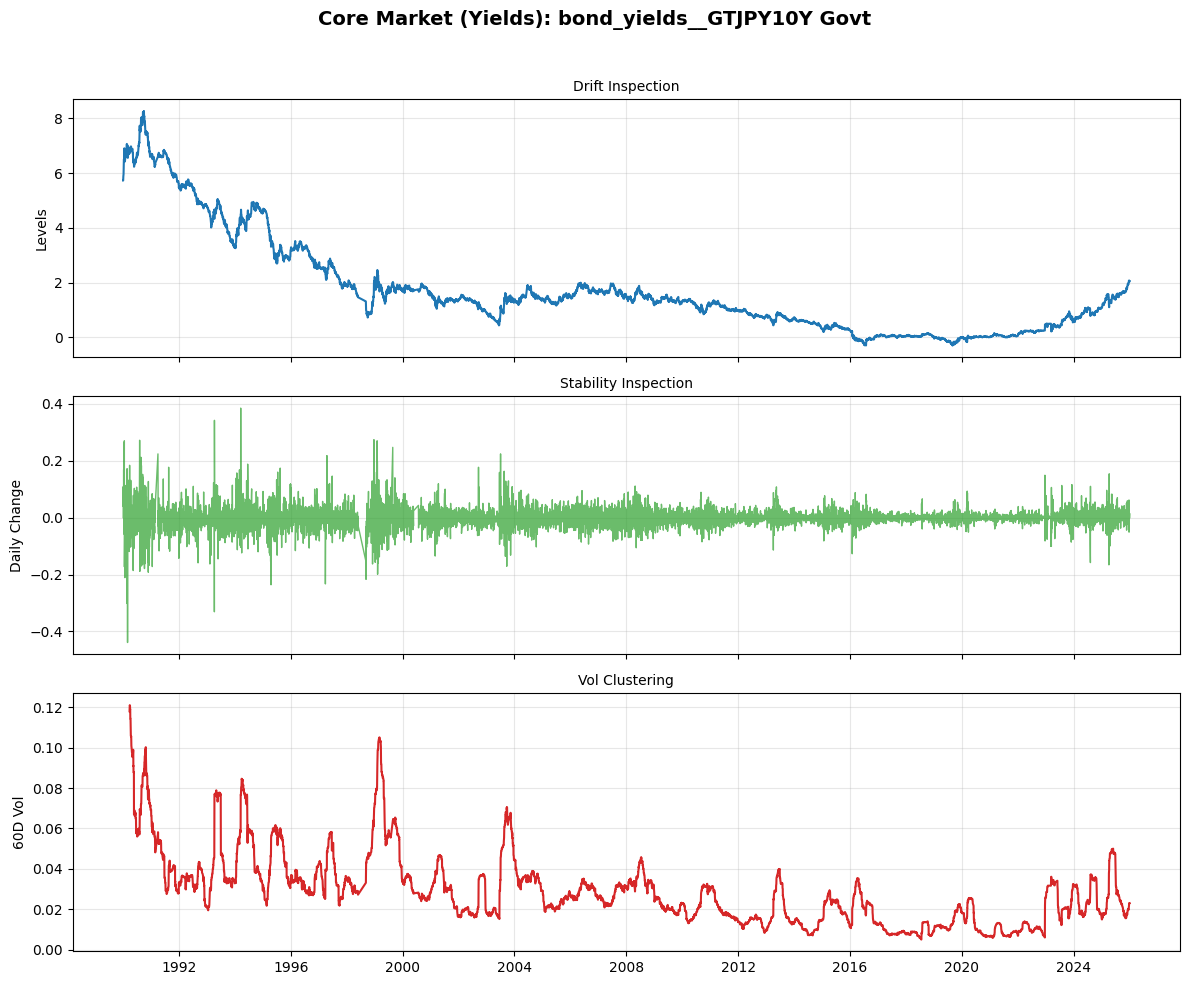

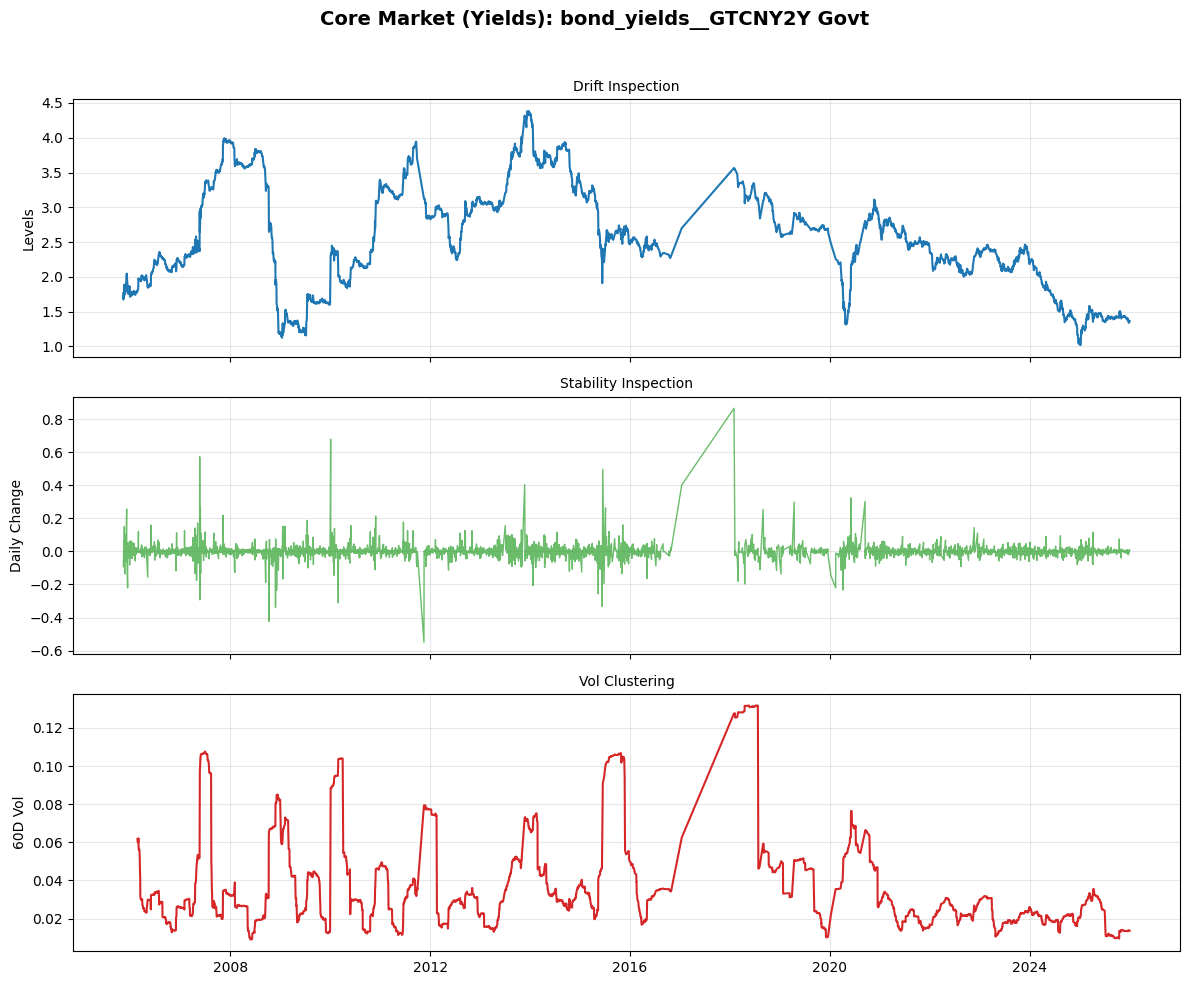

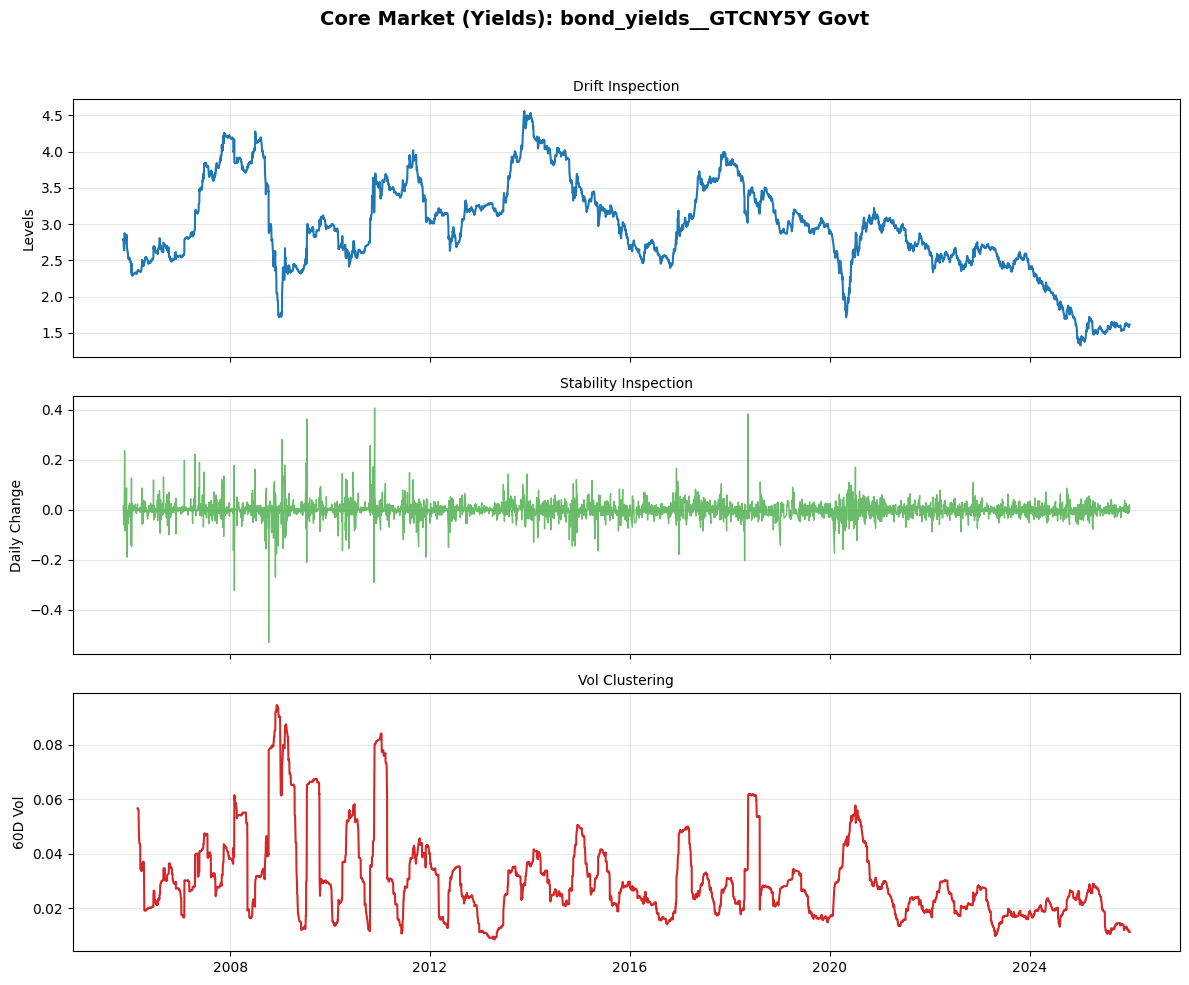

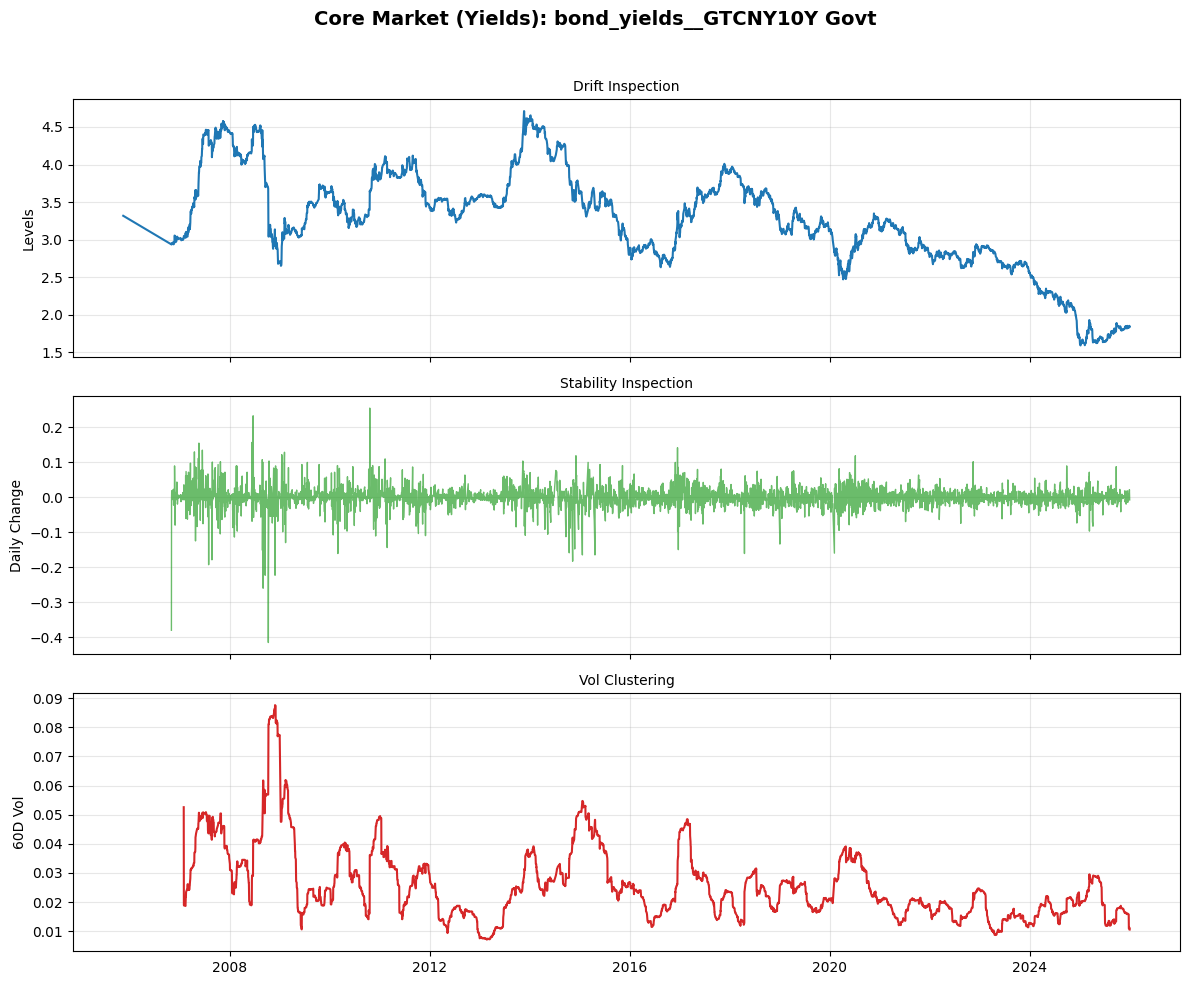

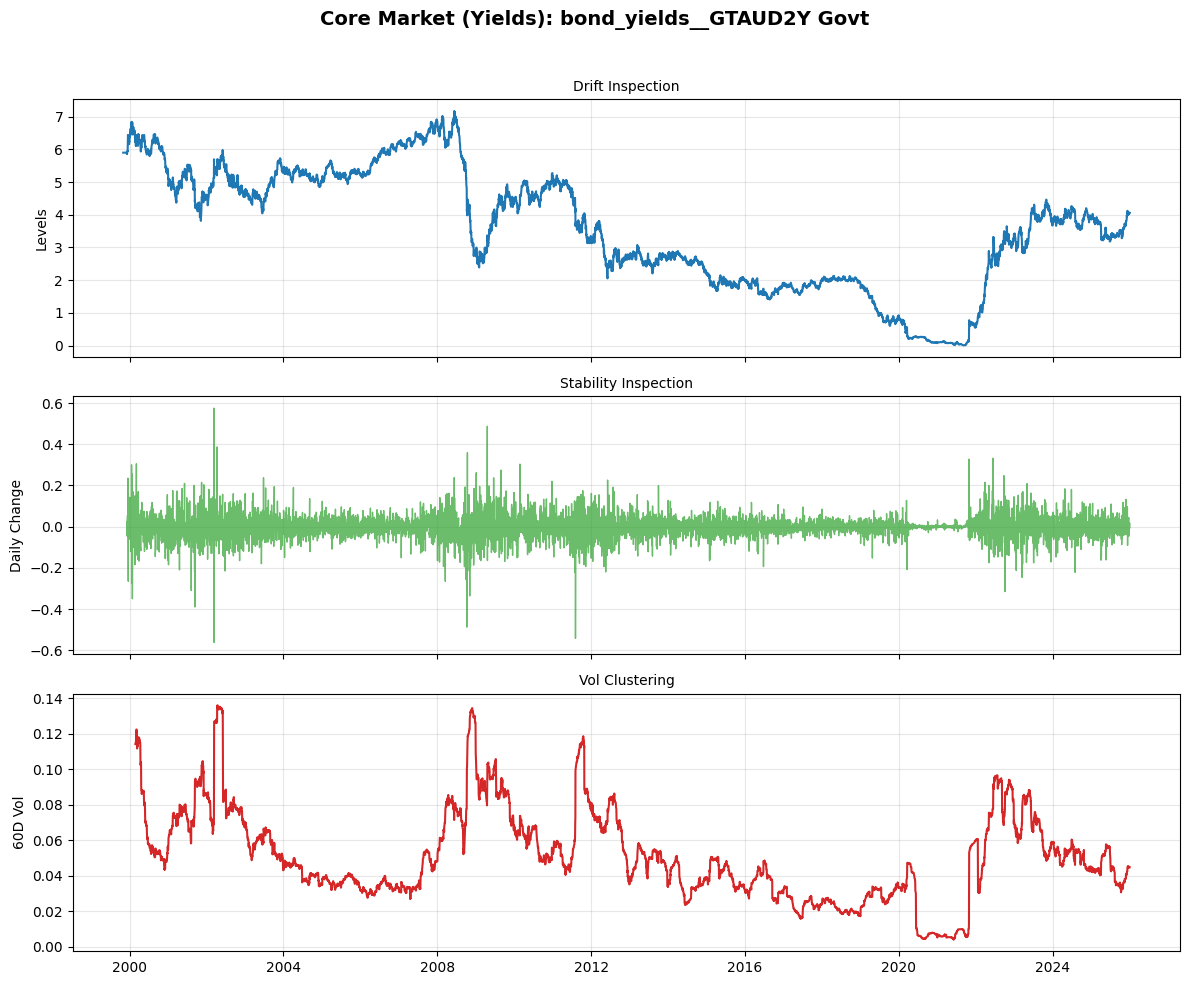

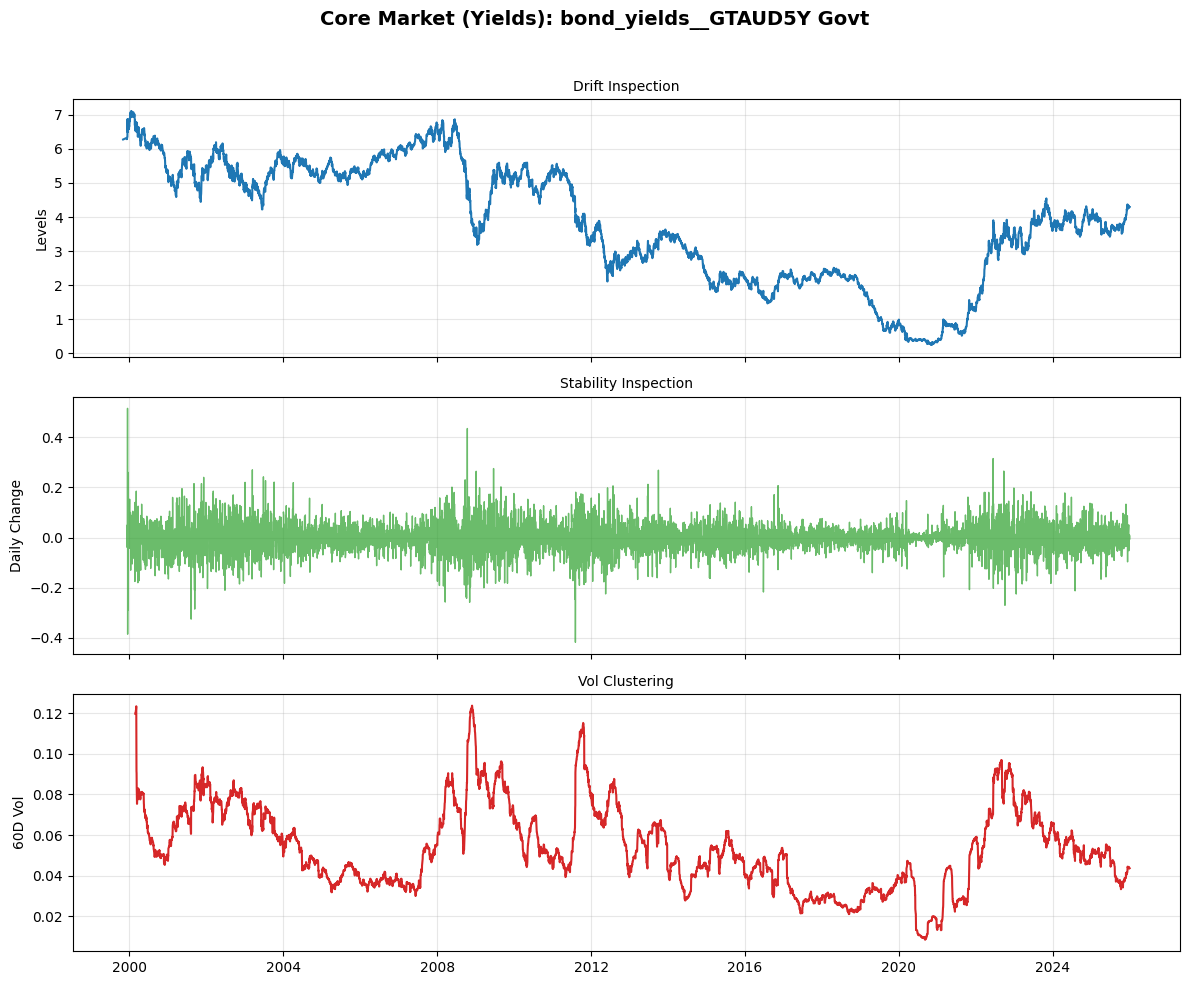

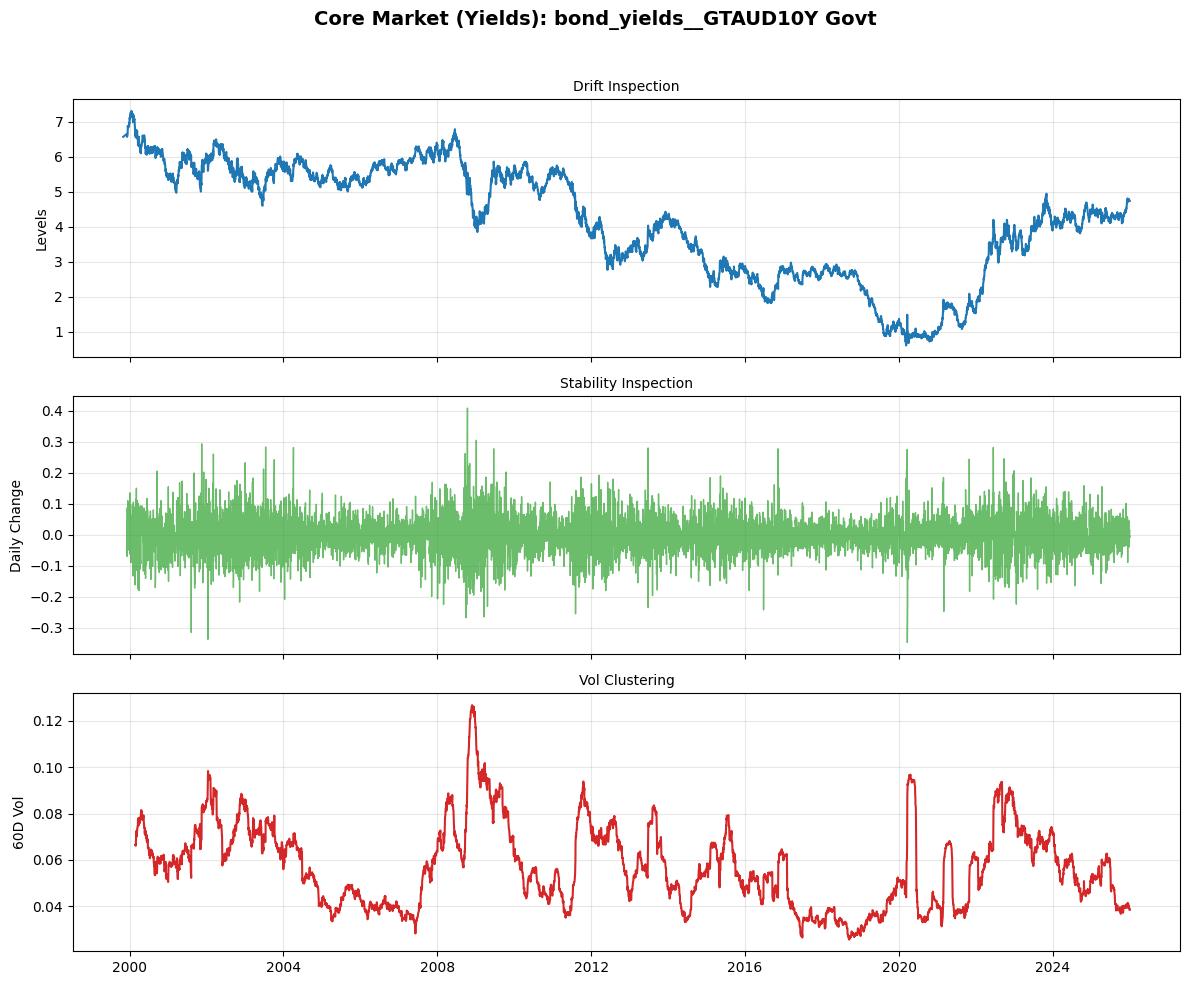

In [5]:
core_yields = [c for c in df.columns if c.startswith("bond_yields__")]
plot_structural_check(df, core_yields, "Core Market (Yields)")

Observations: Policy & Macro Drivers

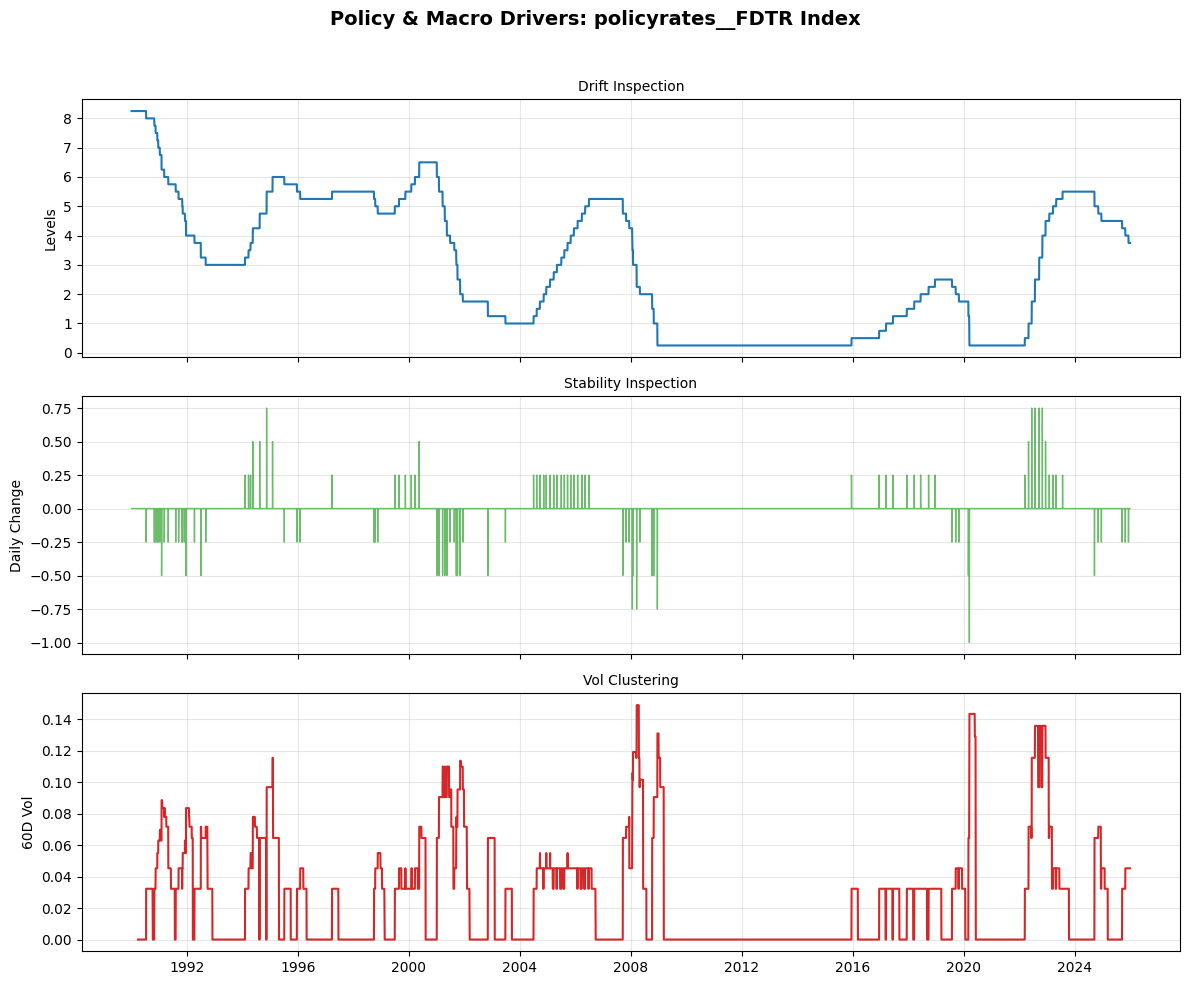

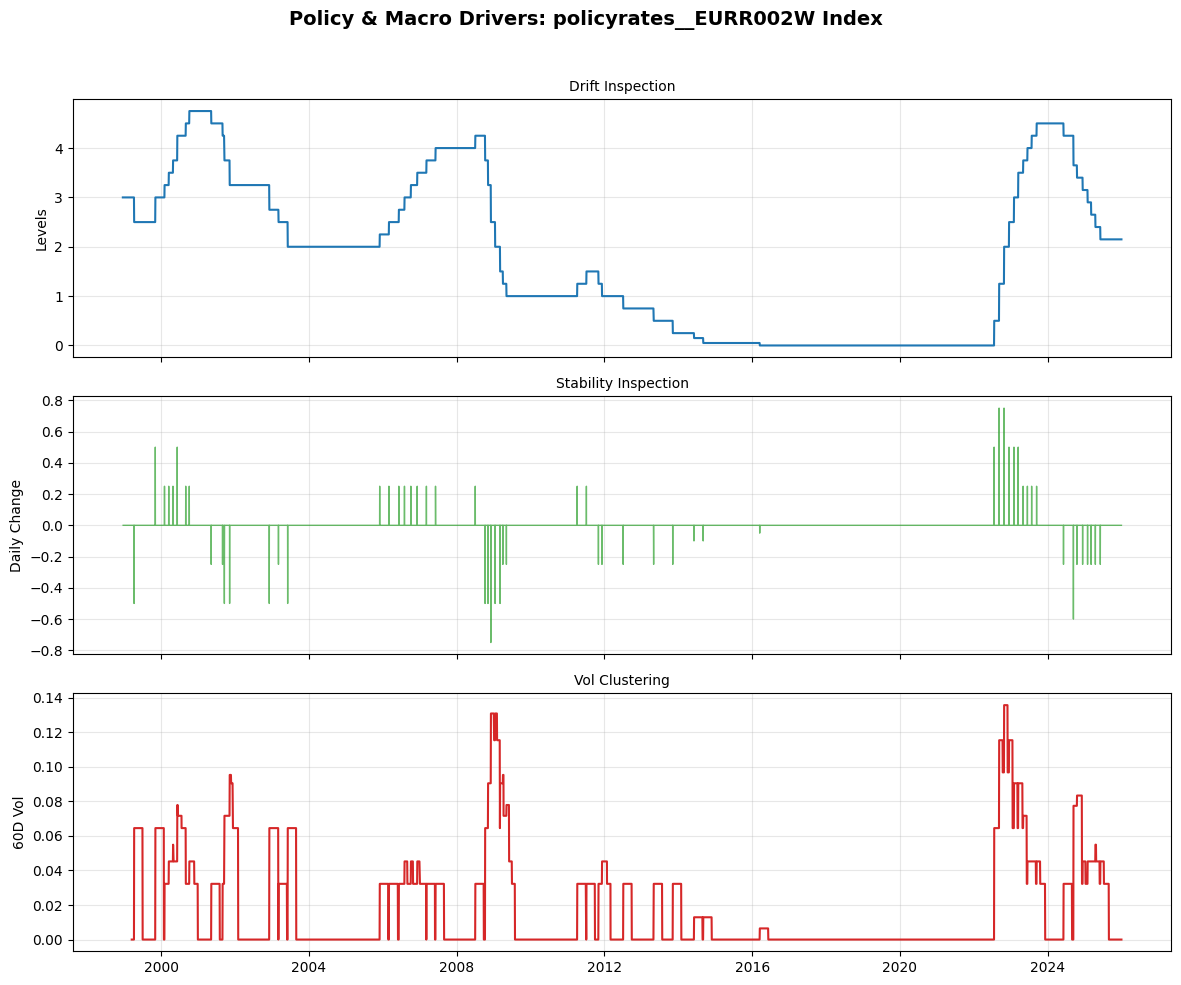

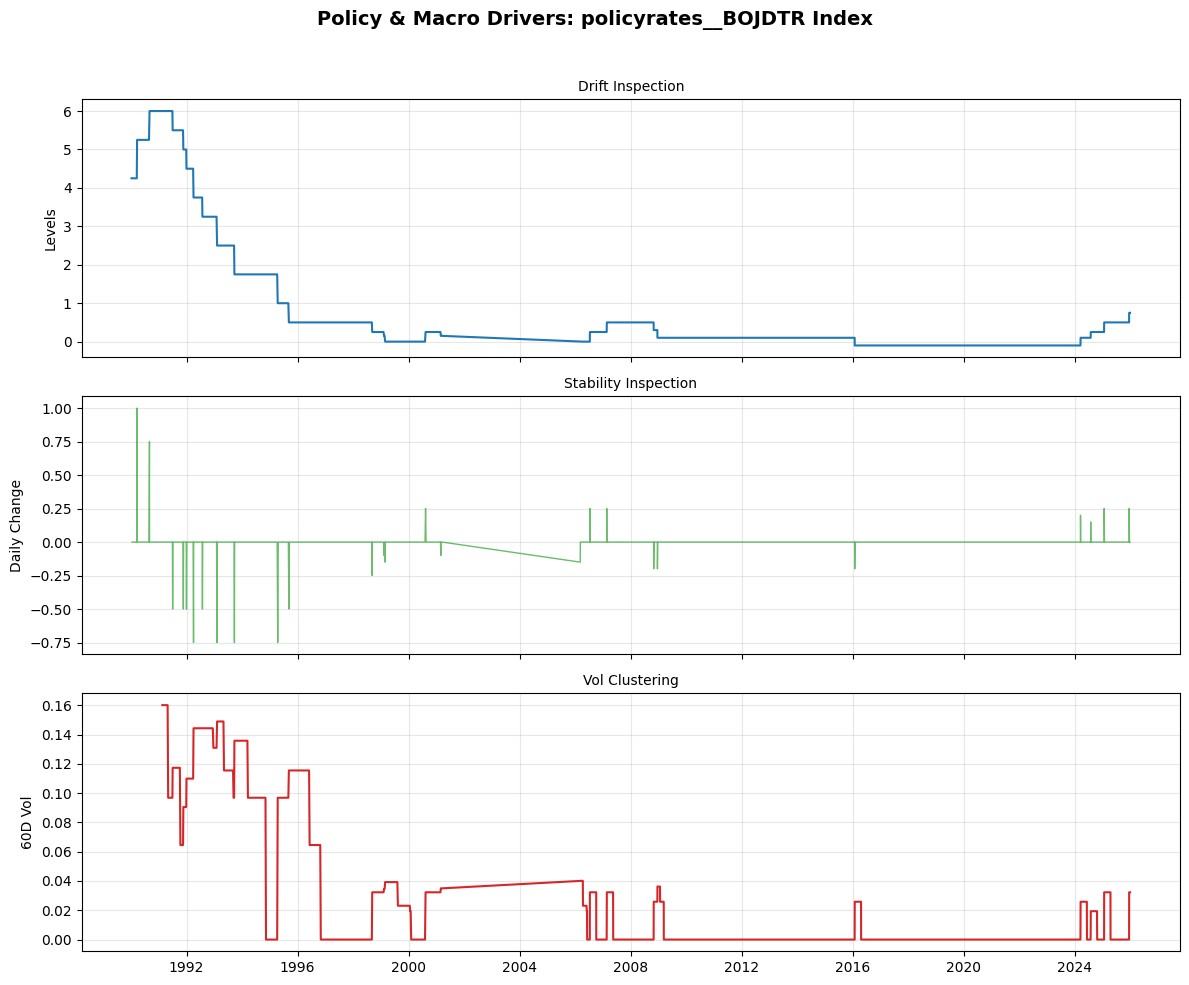

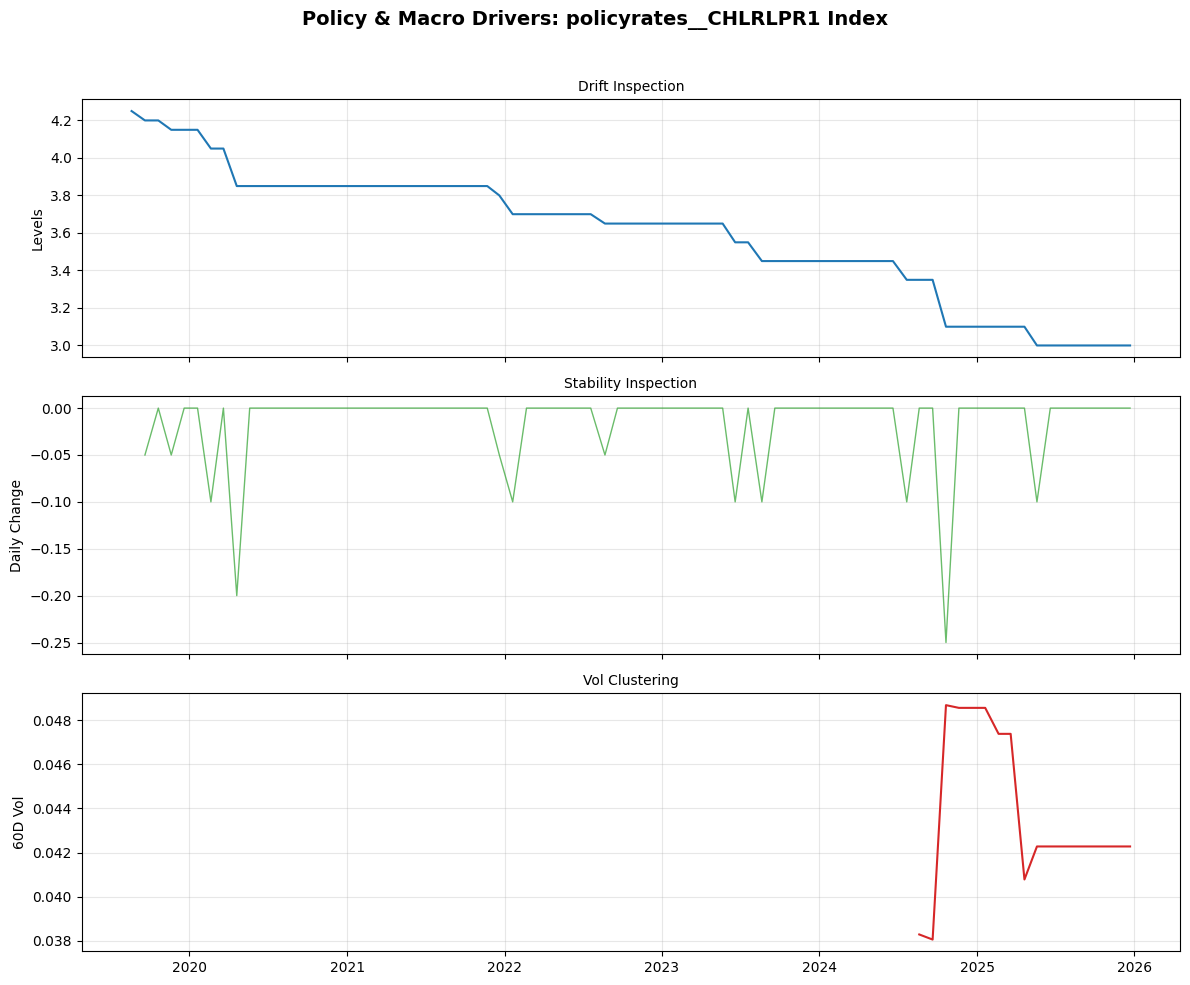

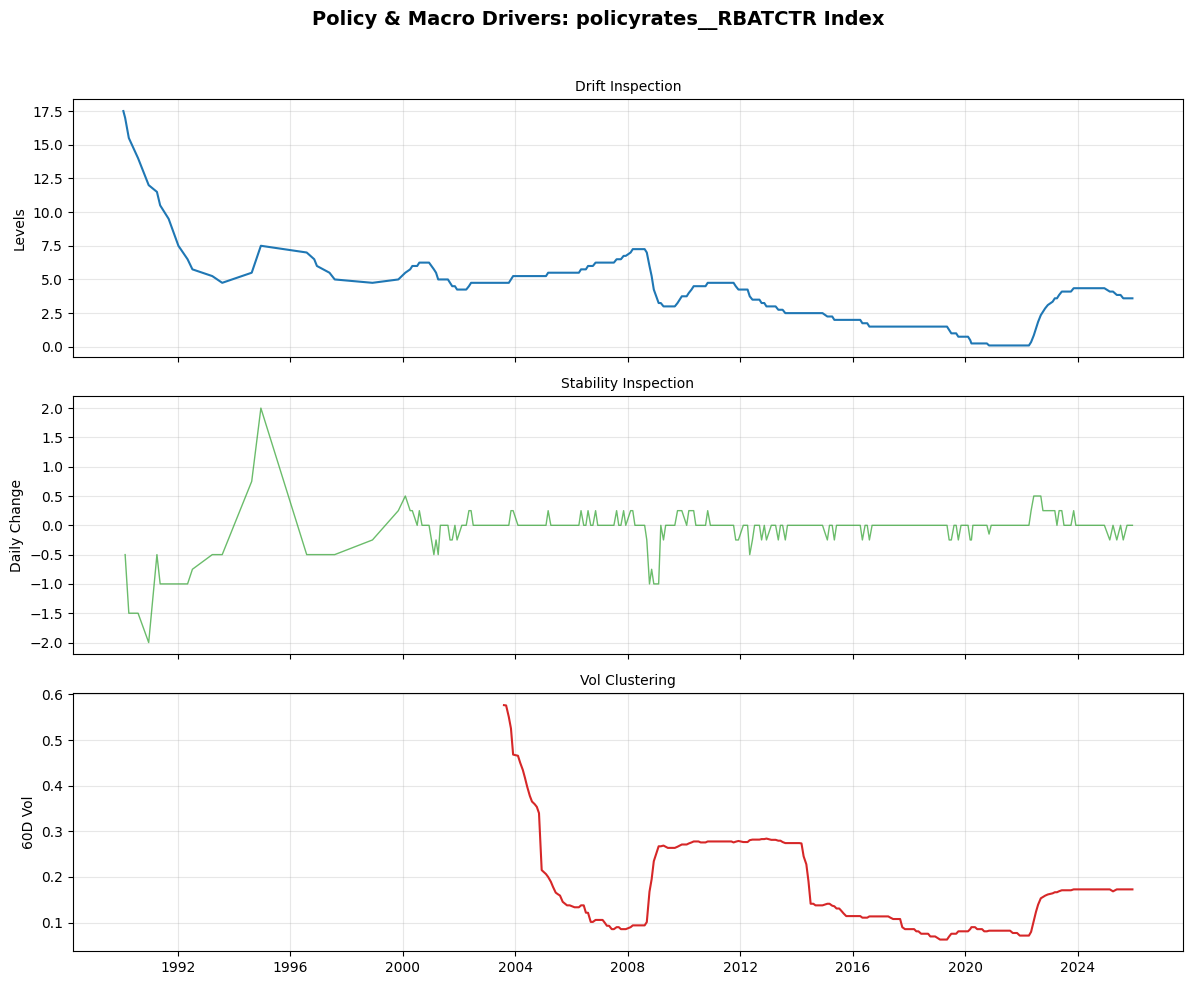

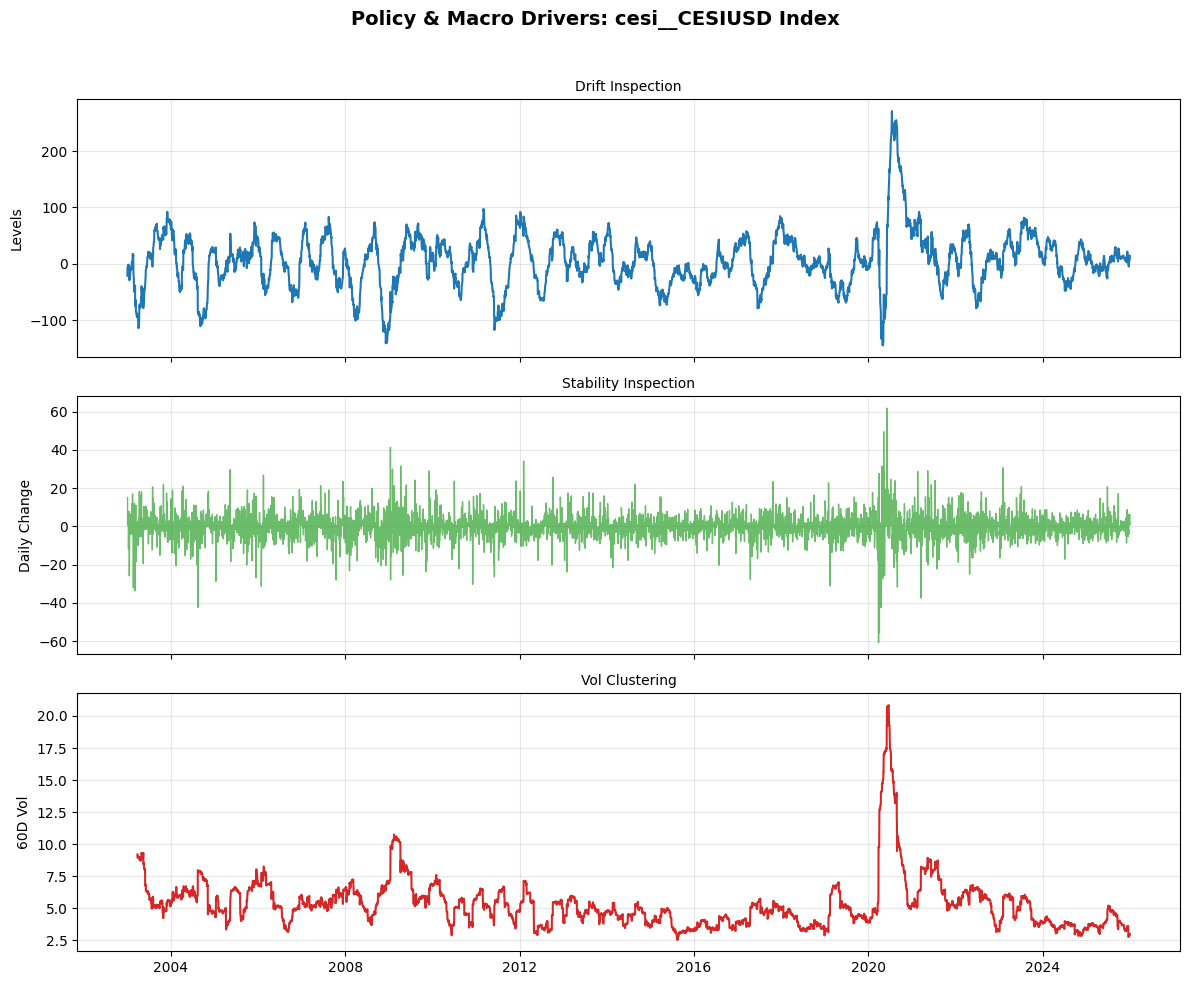

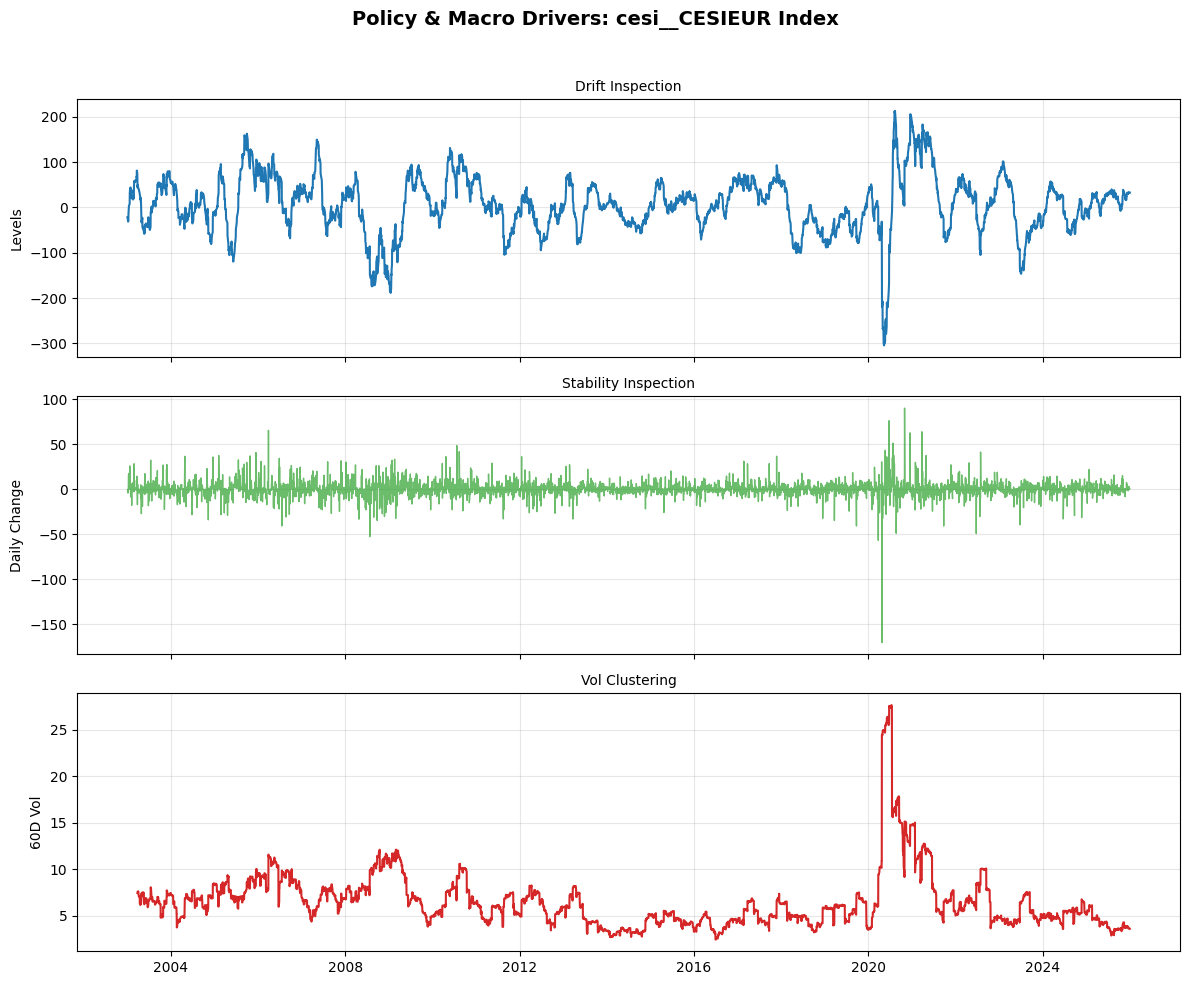

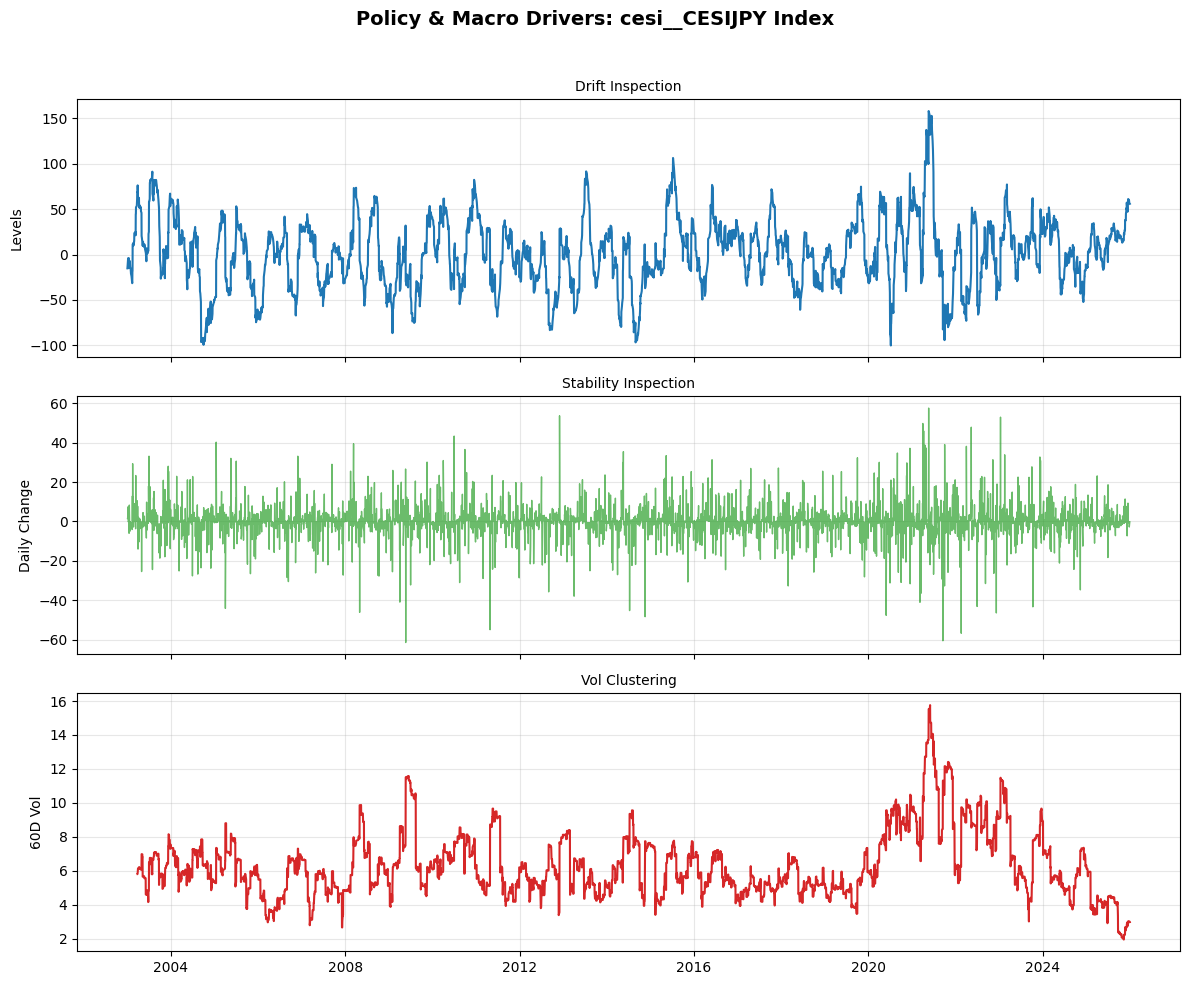

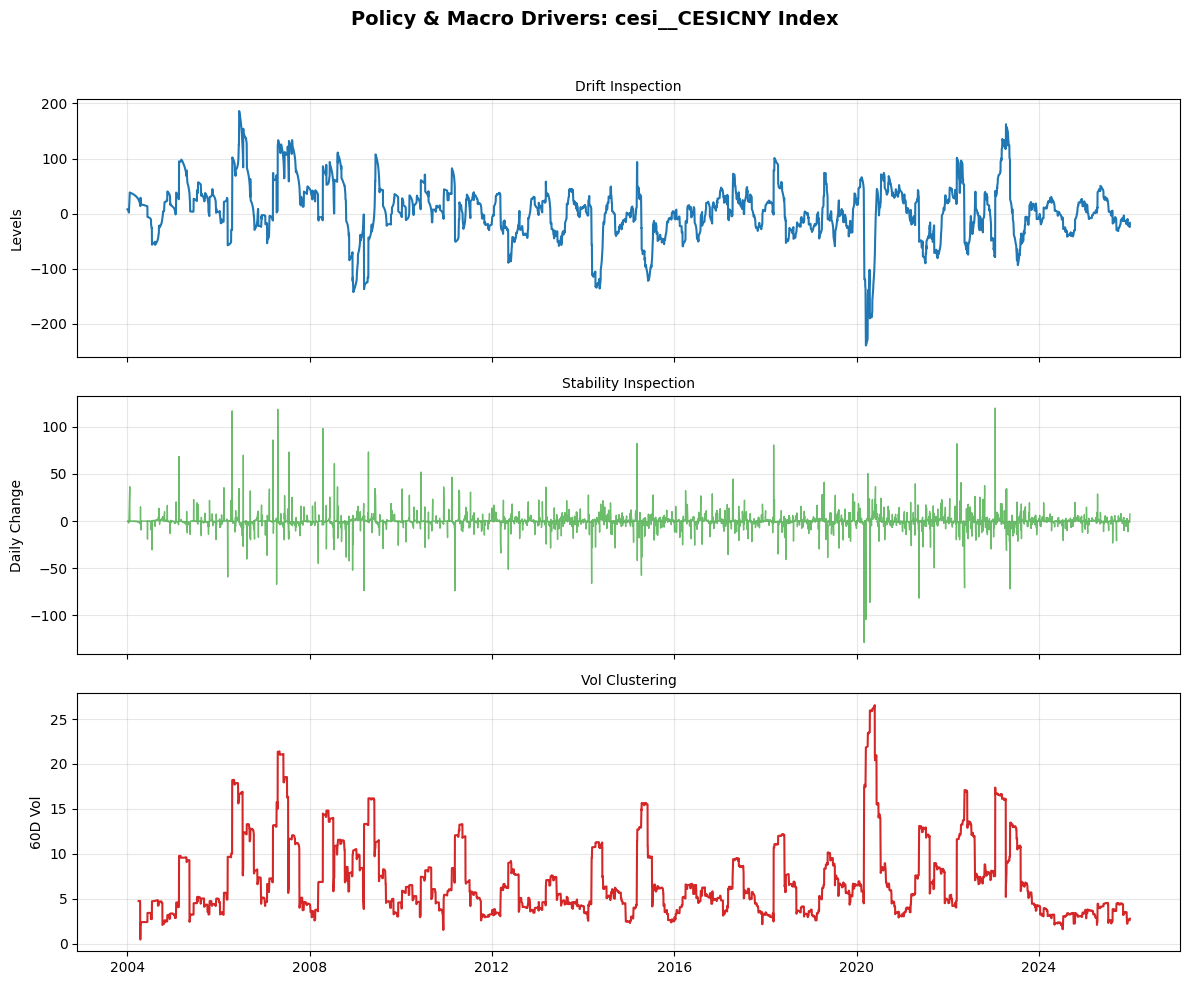

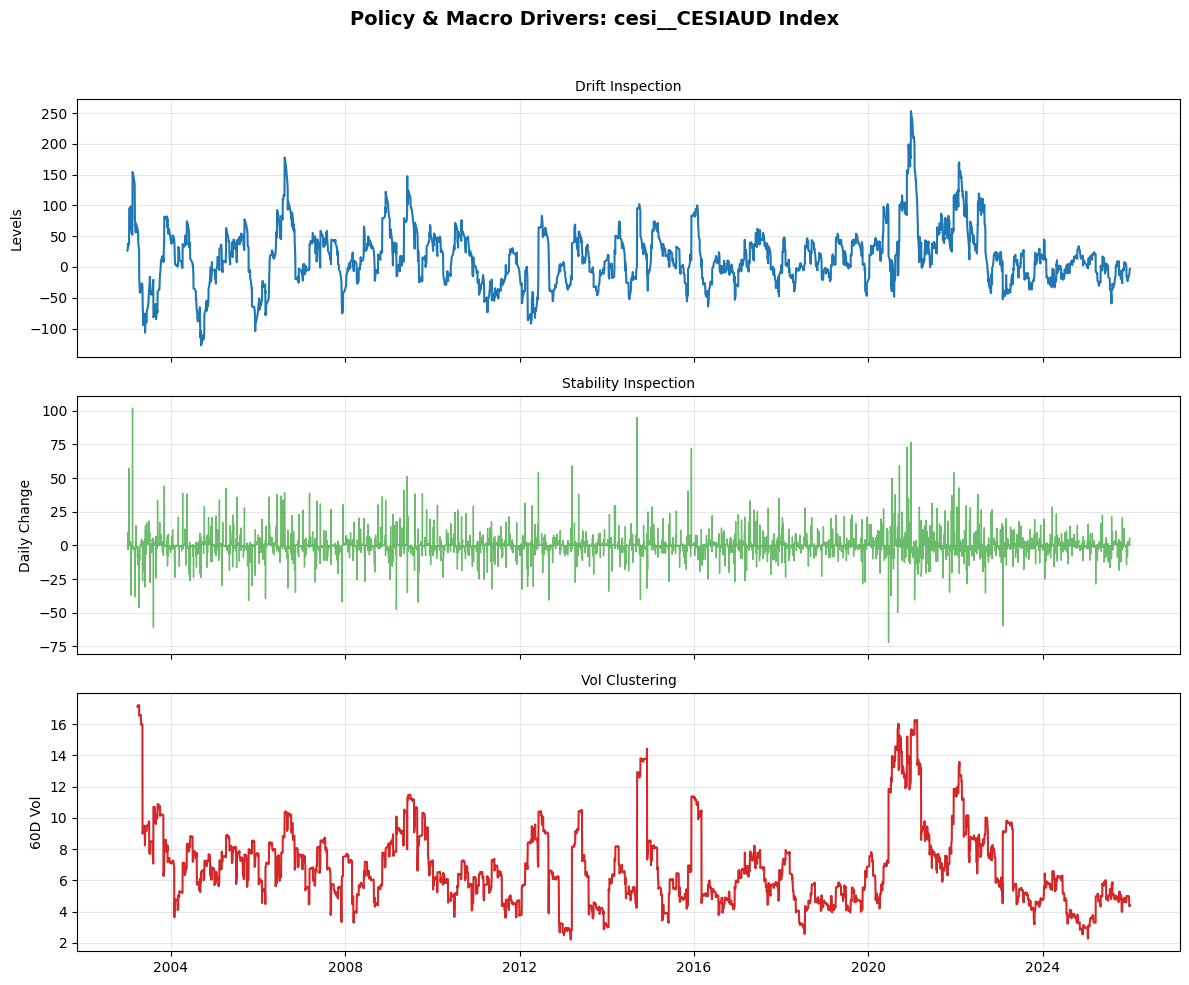

In [6]:
# Filter for Policy Rates and CESI (Citi Economic Surprise Index)
macro_cols = [c for c in df.columns if c.startswith("policyrates__") or c.startswith("cesi__")]
plot_structural_check(df, macro_cols, "Policy & Macro Drivers")


Stress Indicators

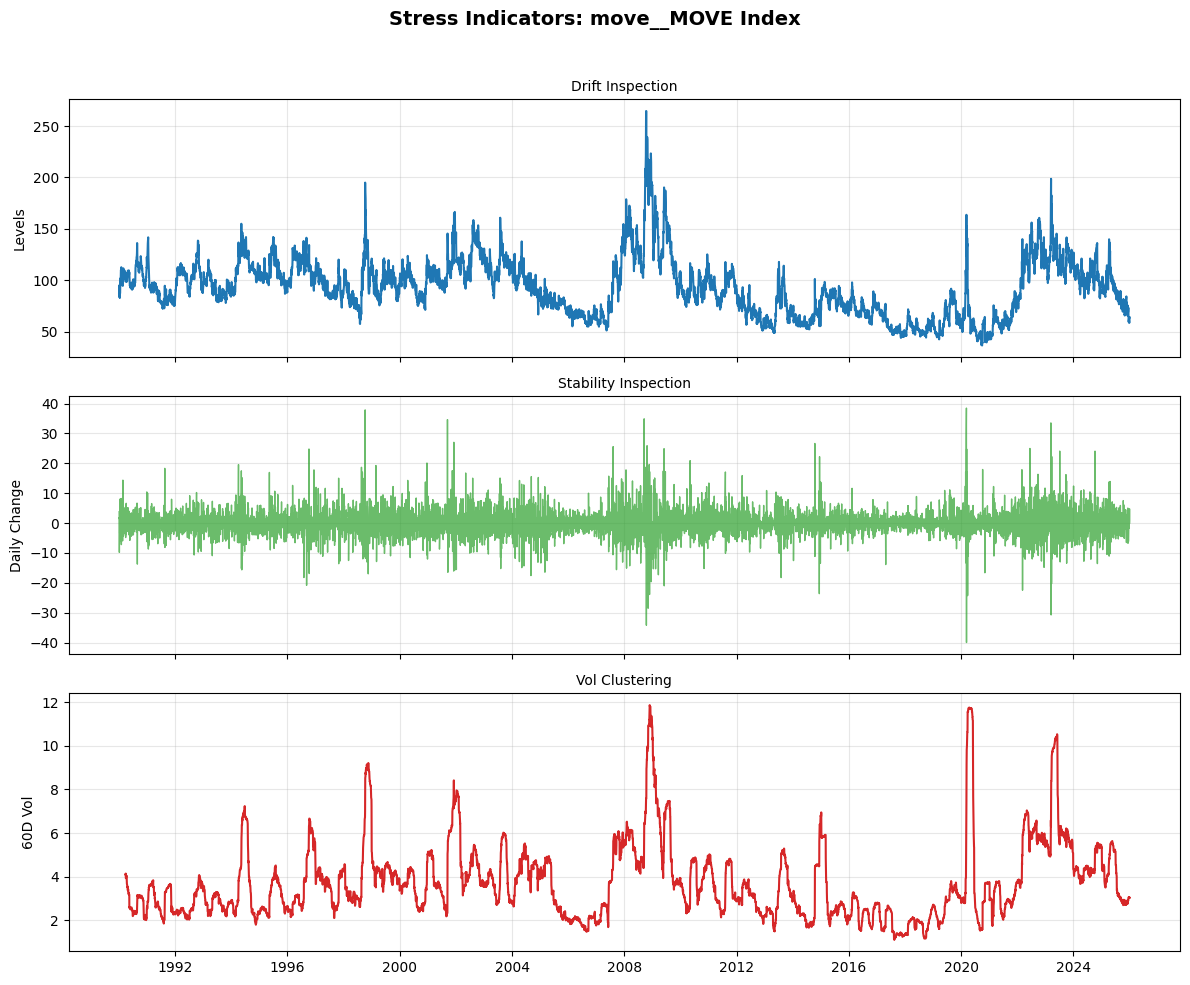

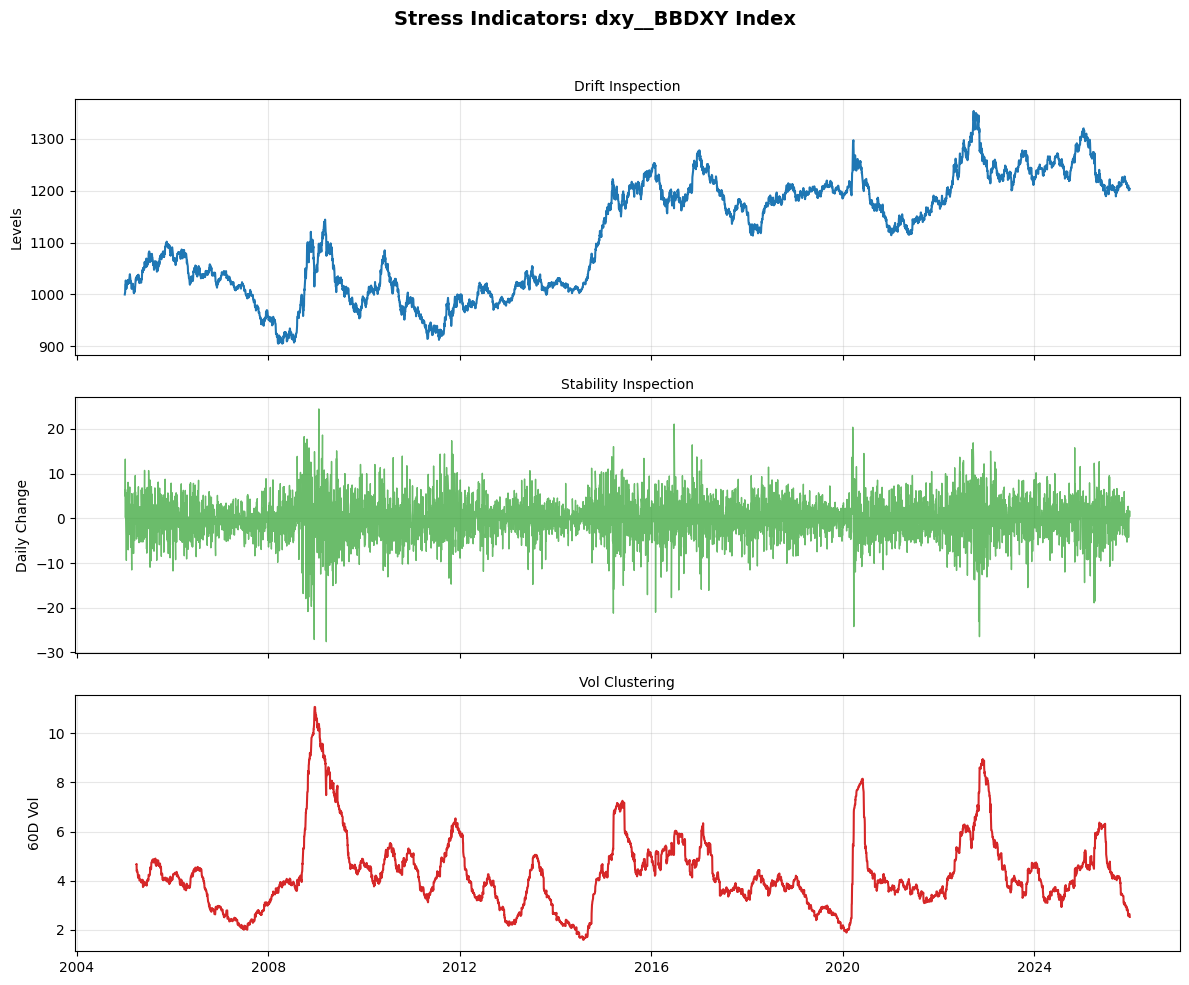

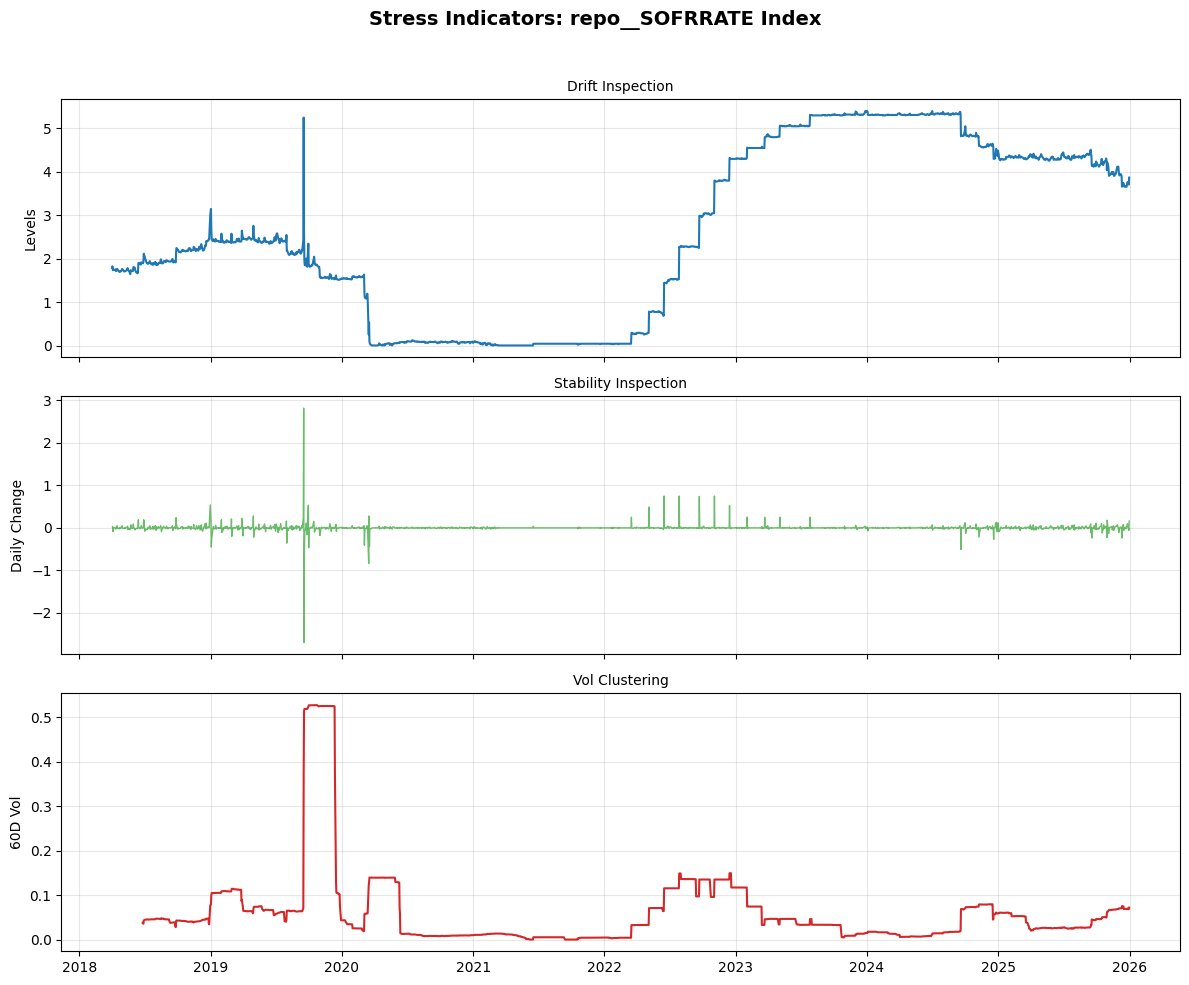

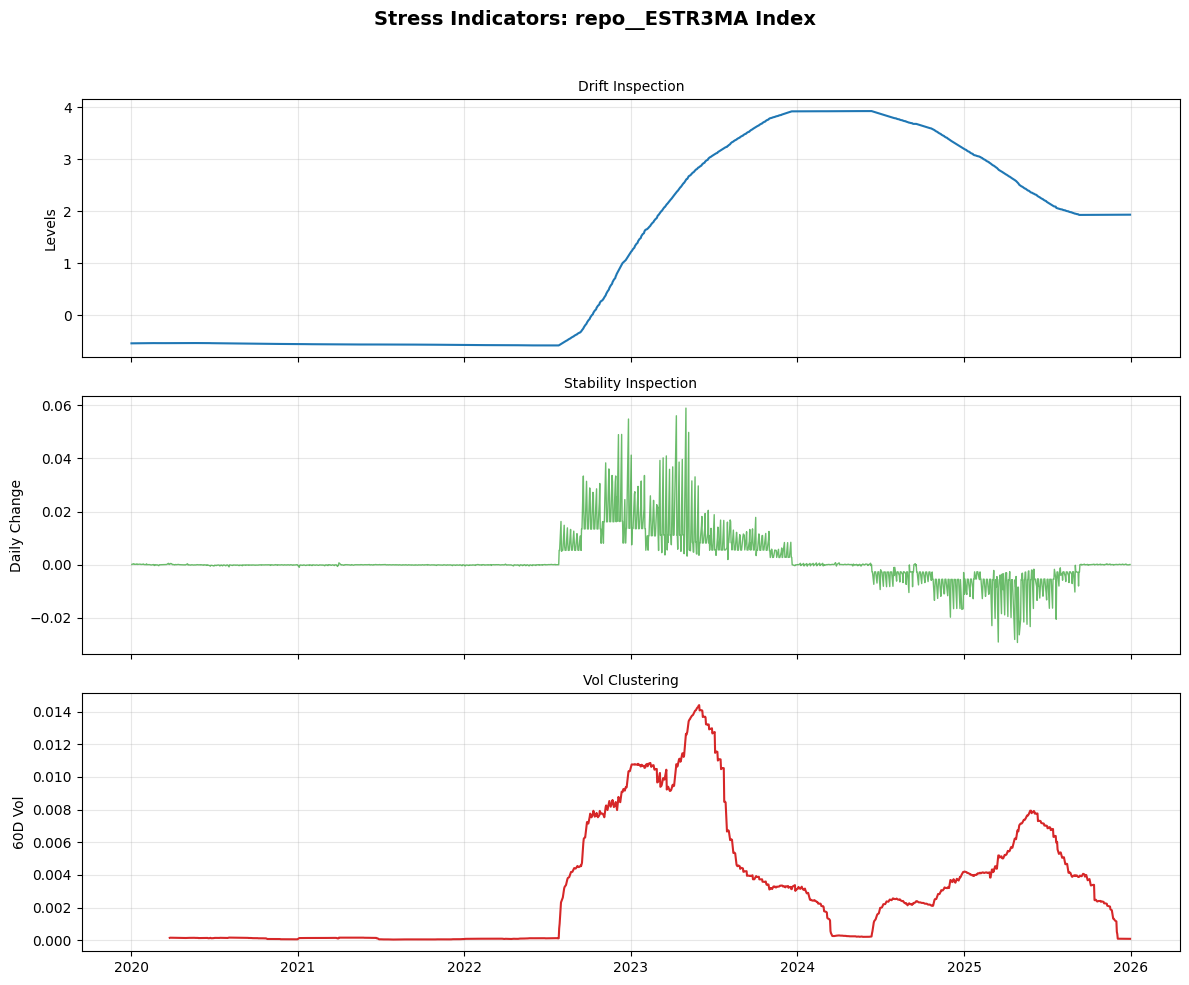

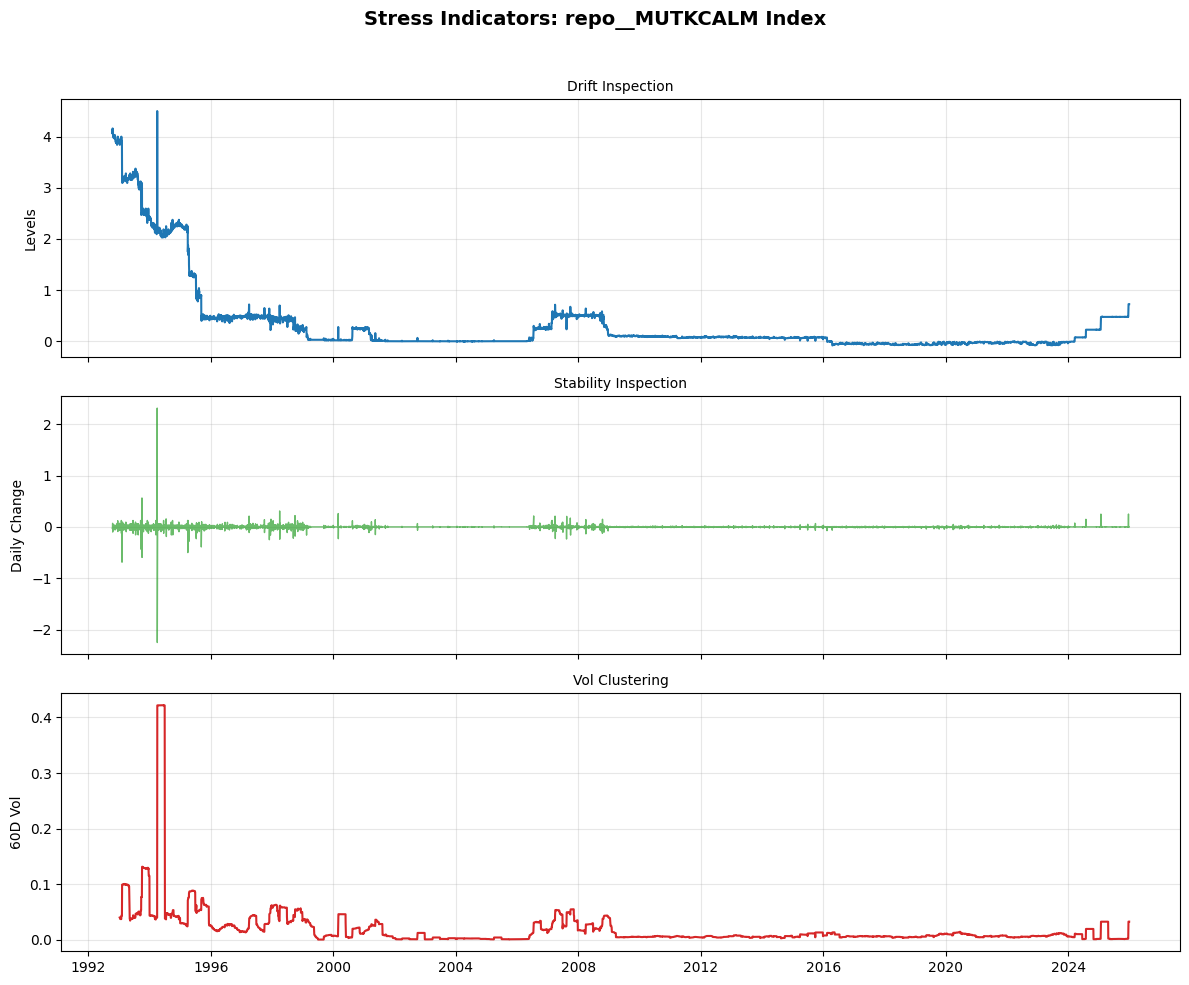

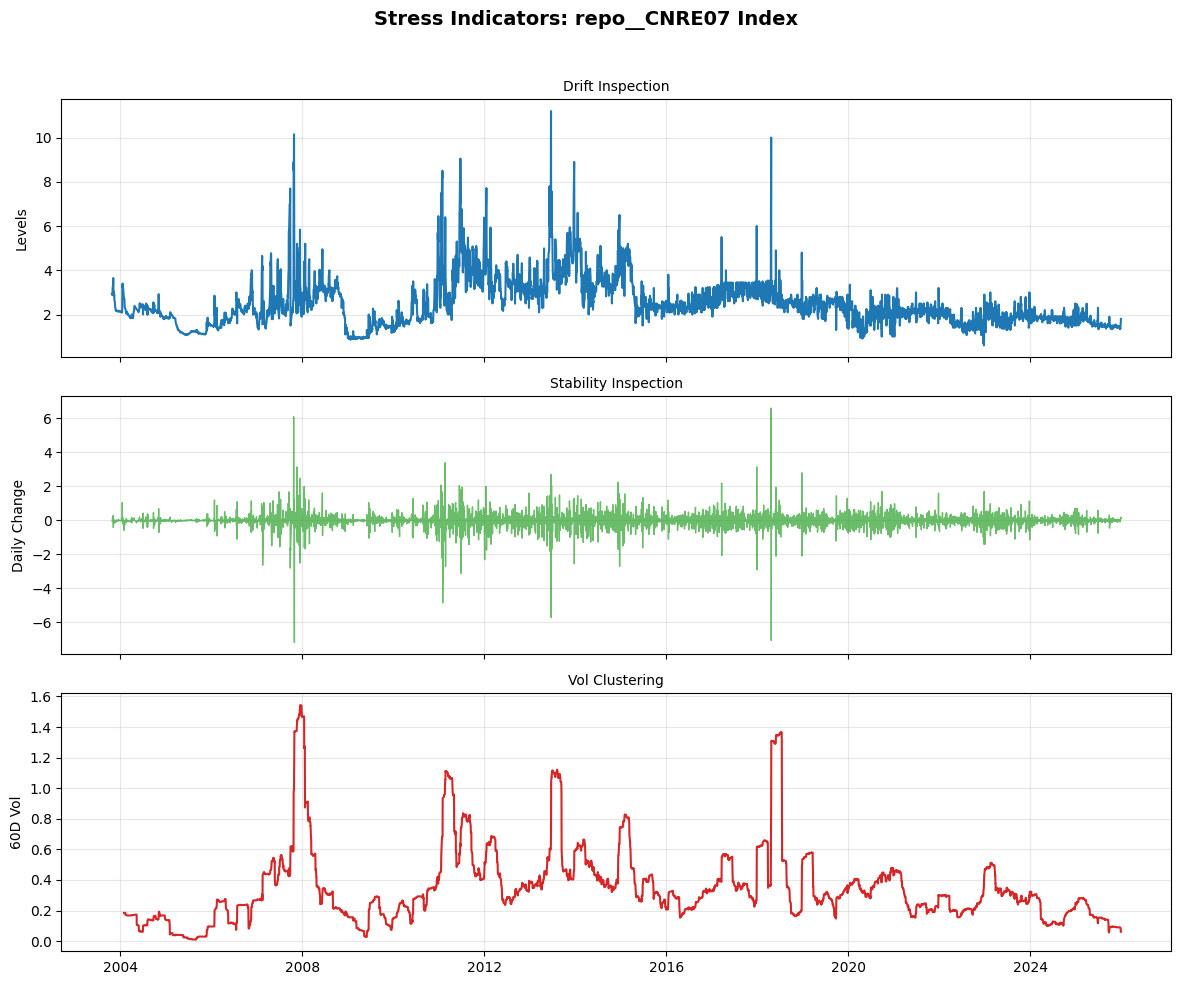

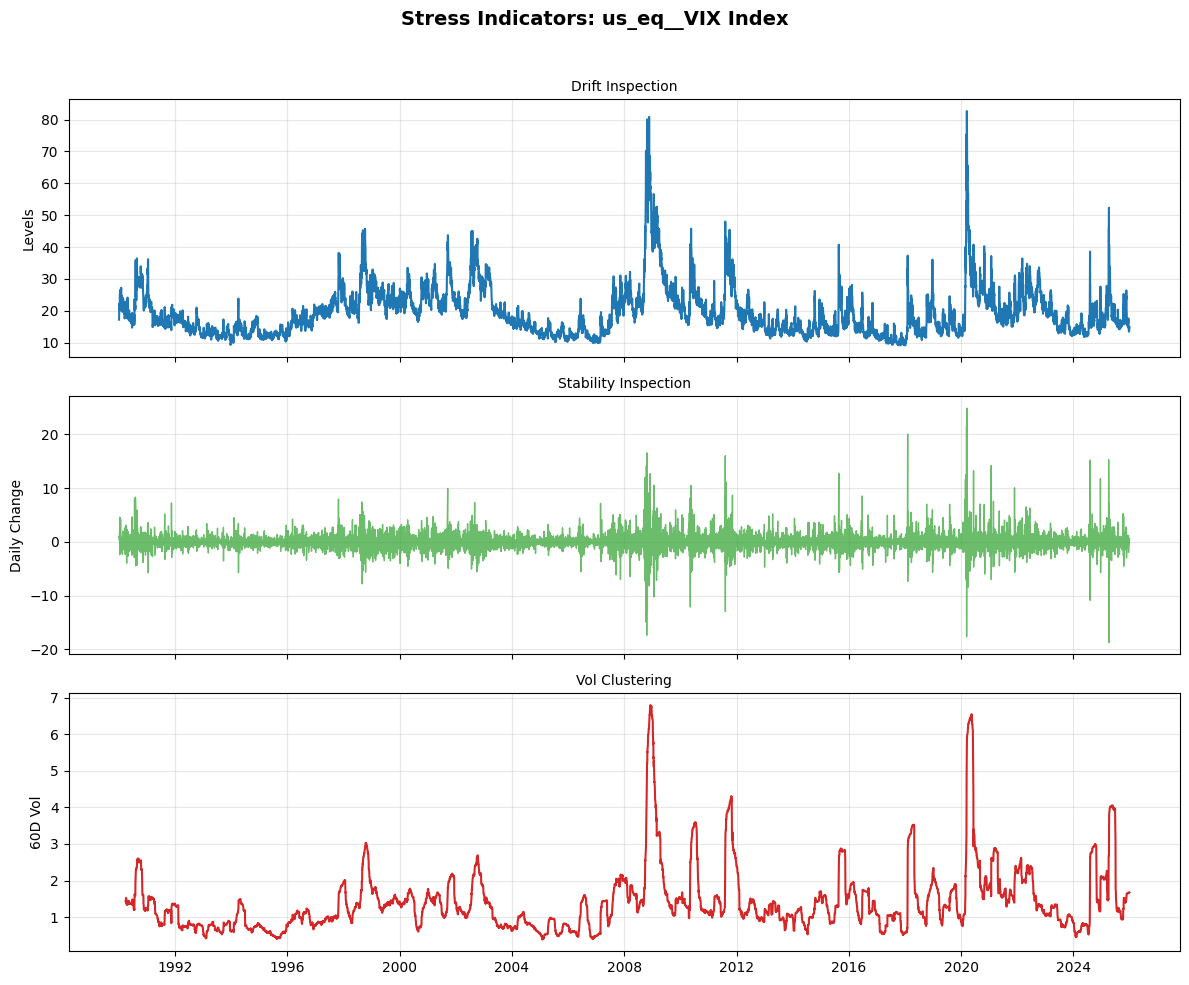

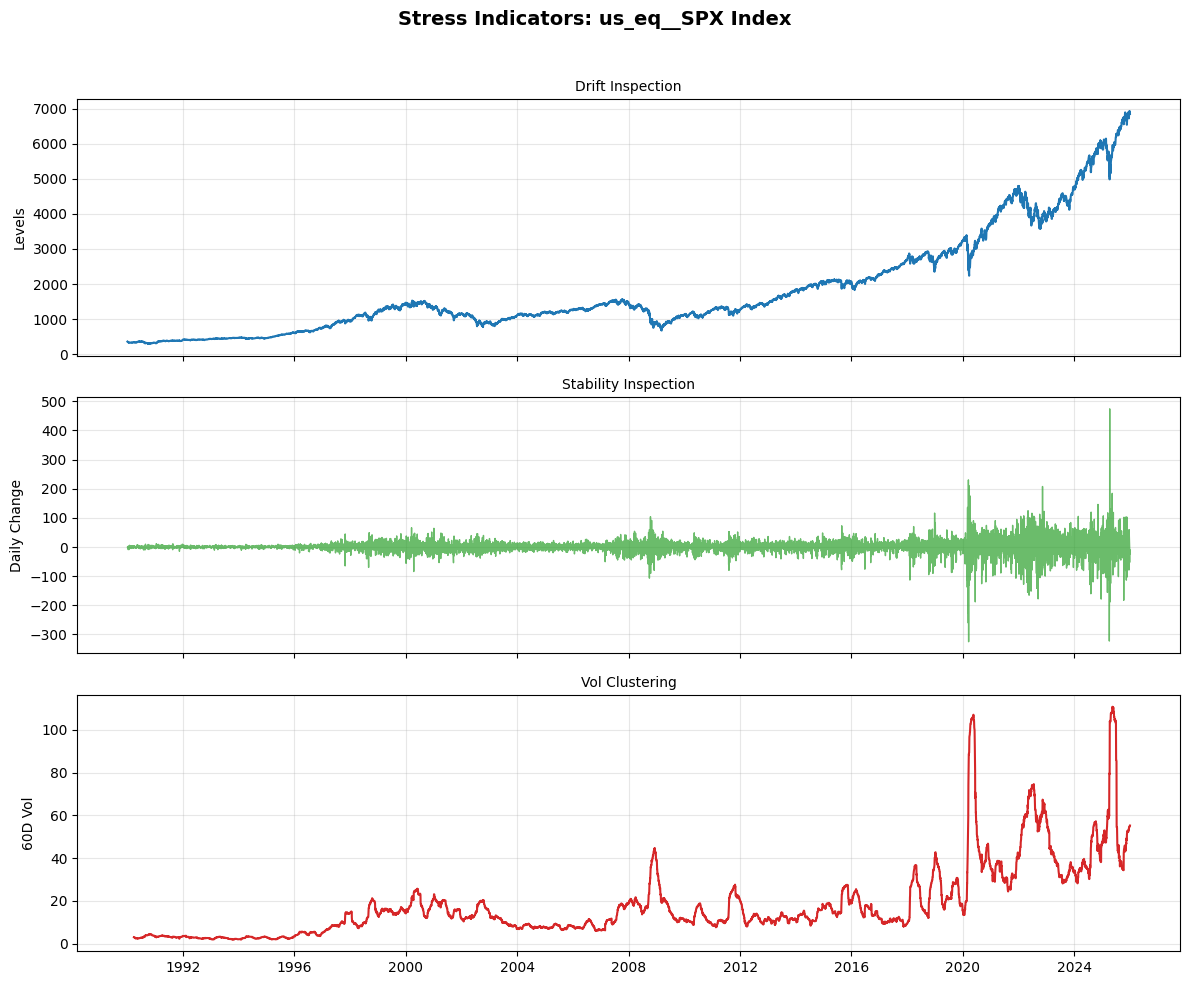

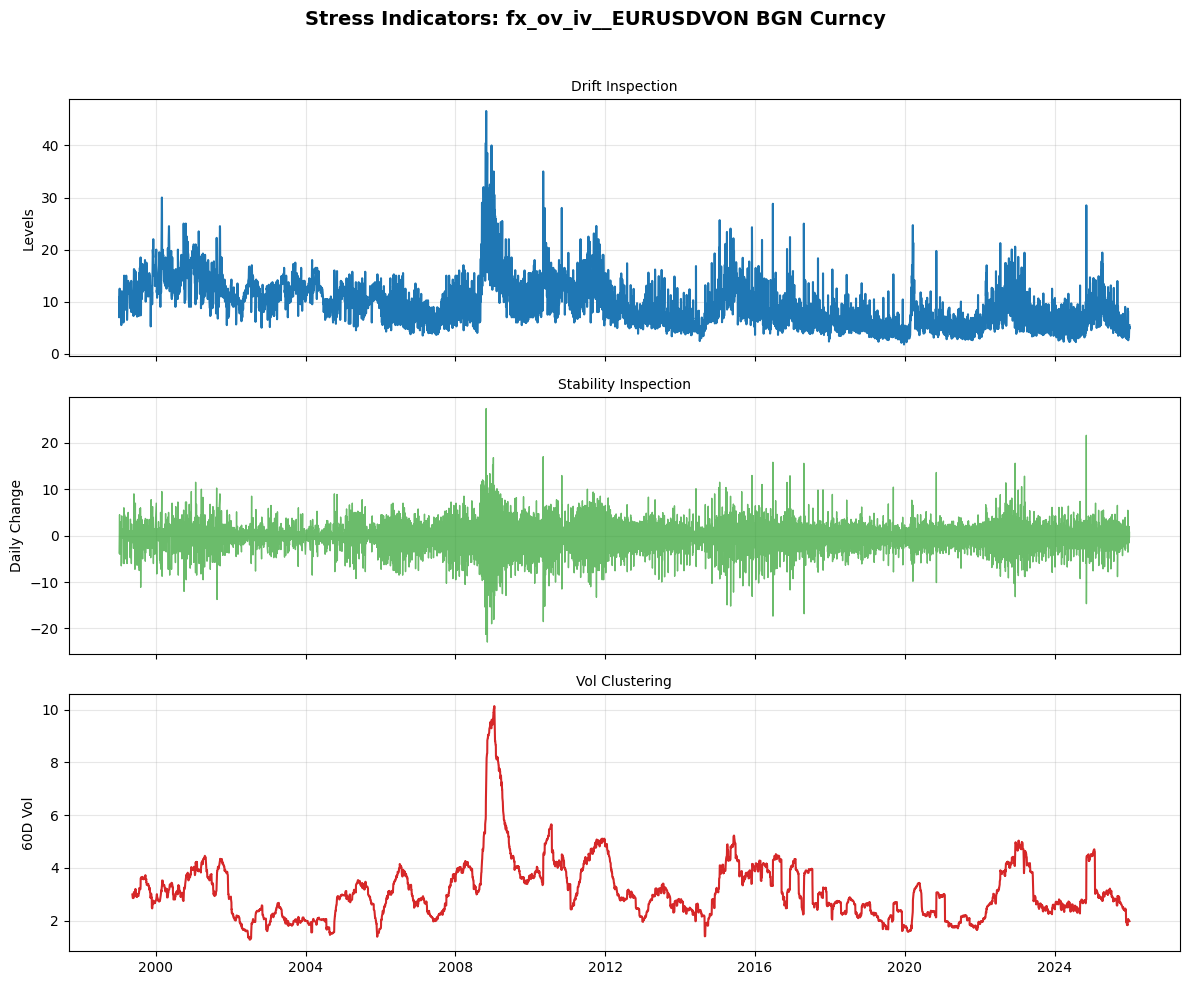

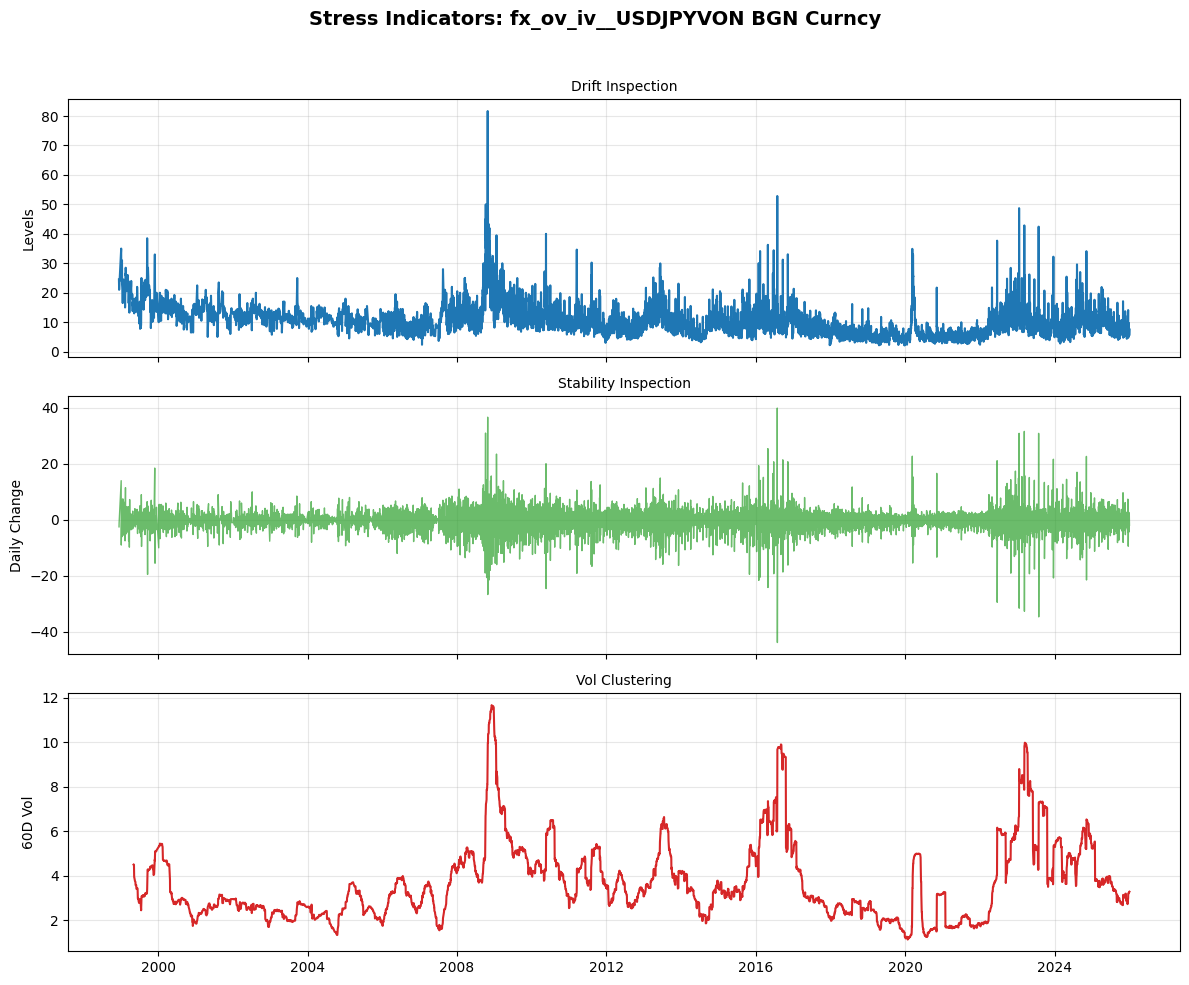

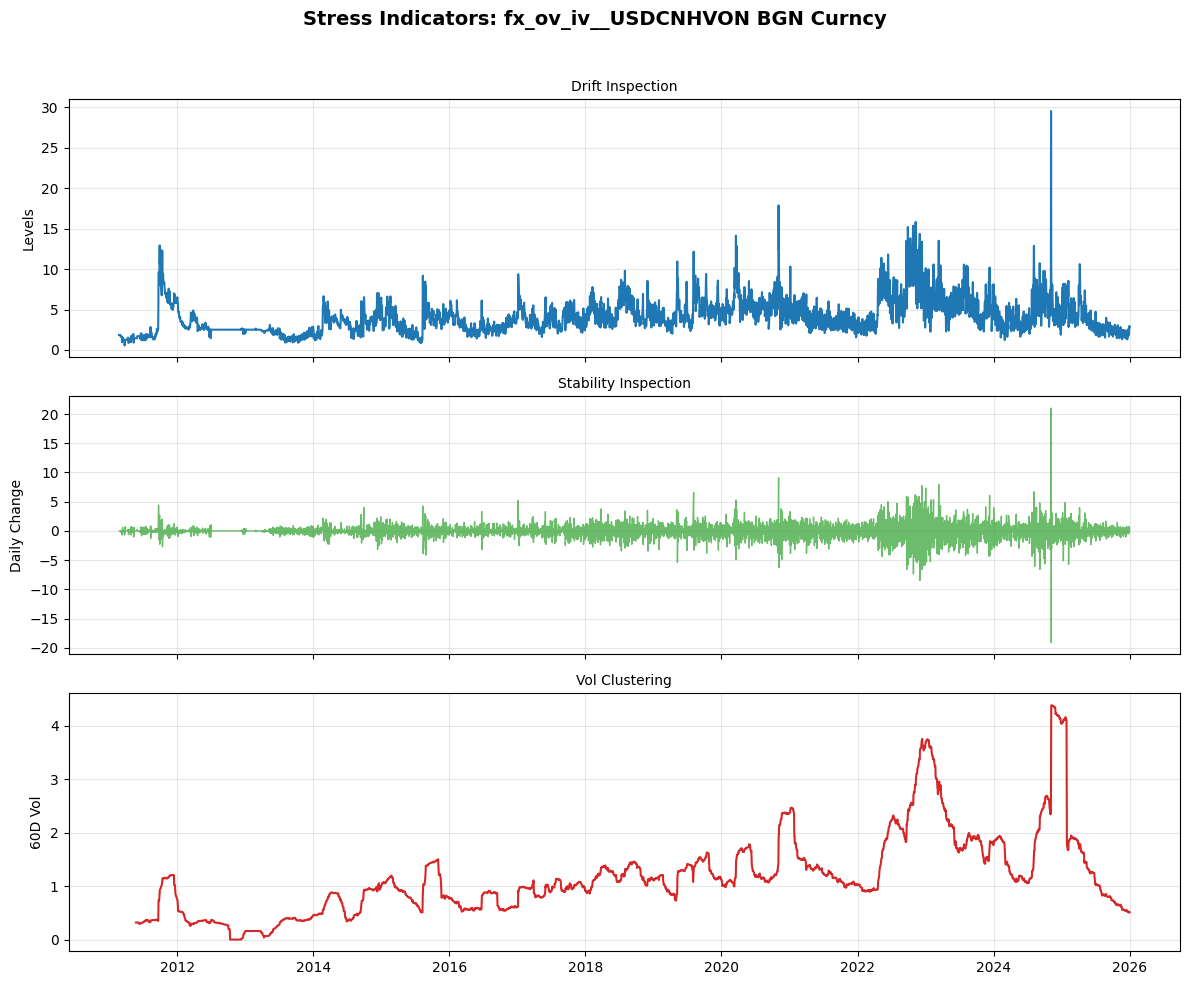

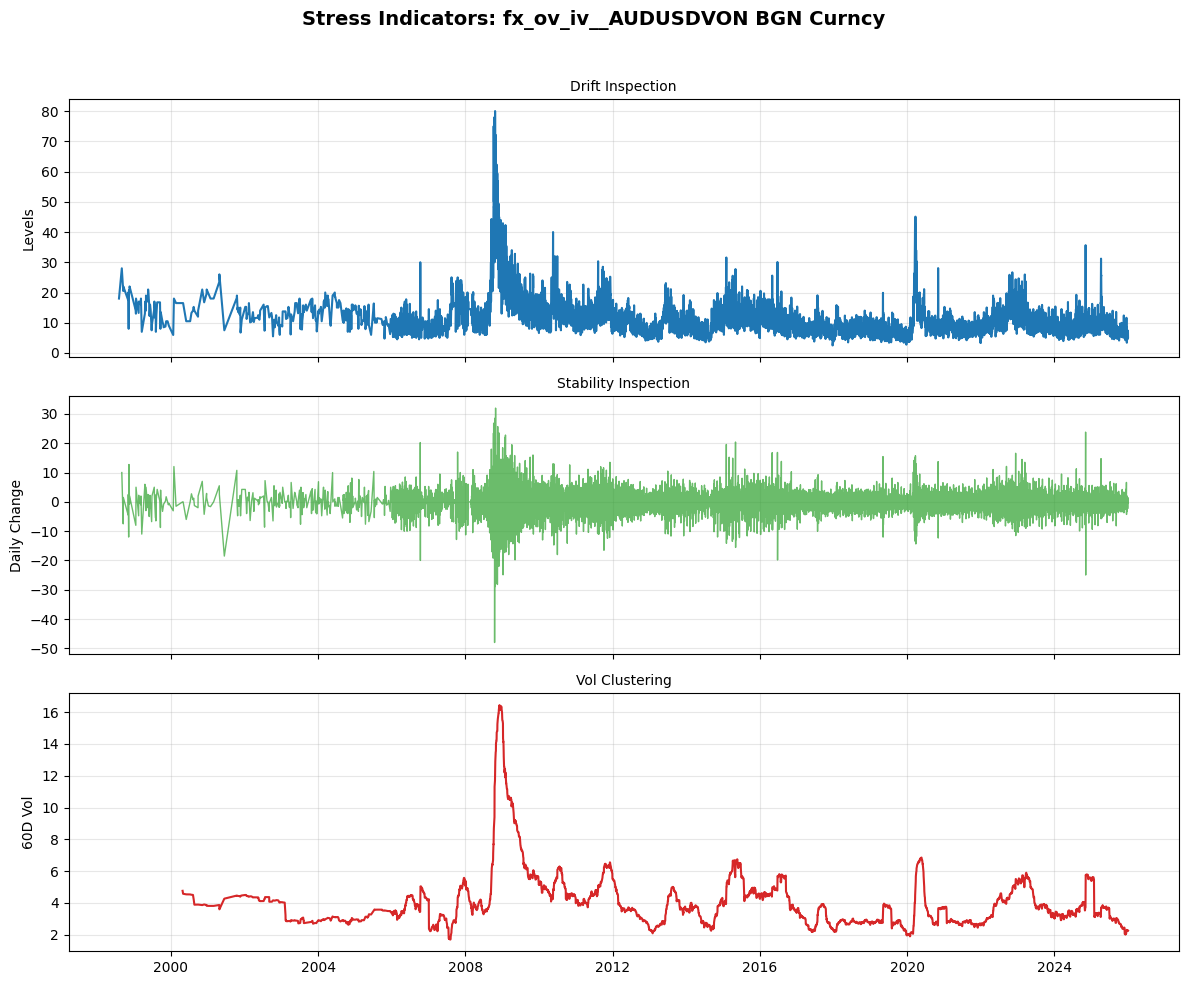

In [7]:

stress_keywords = ["move__", "dxy__", "repo__", "us_eq__", "fx_ov_iv__"]
stress_cols = [c for c in df.columns if any(k in c for k in stress_keywords)]


plot_structural_check(df, stress_cols, "Stress Indicators")